# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [9]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [12]:
# Try loading one file

# Loading the data set from my local drive.
df = pd.read_parquet(r'C:\TINTU KURIAN\DATA SCIENCE COURSE - UPGRAD\GRADED QUESTION\2025 - July 08 deadline - NYC taxi\Datasets and Dictionary-NYC\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [13]:
df.head(3)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3    1.0      0.5         0.0           0.0   
1             1          7.9    1.0      0.5         4.0           0.0   
2             1         14.9    1.0      0.5        15.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0          14.3                   2.5          0.0  
1                    1.0          16.9                   2.5          0.0  
2                    1.0          34.9                   2.5          0.0

In [14]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [15]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year, combining all the monthly data

# Select the folder having data files
import os
from datetime import date

# Select the folder having data files

folder_path = r"C:\TINTU KURIAN\DATA SCIENCE COURSE - UPGRAD\GRADED QUESTION\2025 - July 08 deadline - NYC taxi\Datasets and Dictionary-NYC\trip_records"

# Create a list of all twelve files to read

file_list = sorted(os.listdir(folder_path))  # to sort files

# Initialise an empty dataframe

df = pd.DataFrame()

# iterate through the list of files and sample one by one:

# Now trying to process each file

for file_name in file_list:
    try:
        file_path = os.path.join(folder_path, file_name)
        print(f"Processing: {file_name}")


        # Reading the current file (parquet file)
        temp_df = pd.read_parquet(file_path)

        # Extract pickup date and hour
        temp_df["pickup_date"] = temp_df["tpep_pickup_datetime"].dt.date
        temp_df["pickup_hour"] = temp_df["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

        # Loop through each date
        for date in temp_df["pickup_date"].unique():
            day_data = temp_df[temp_df["pickup_date"] == date]
            
    # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = day_data[day_data["pickup_hour"] == hour]

                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.01, random_state=42) 
# Tintu: changing the sampling from 5% to 1% since the 5% gives data shape: (1896400, 22), which is very huge compared to the direction of getting 2.5L to 3.0L samples
                    sampled_data = pd.concat([sampled_data, sample])

 
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing: 2023-1.parquet
Processing: 2023-10.parquet
Processing: 2023-11.parquet
Processing: 2023-12.parquet
Processing: 2023-2.parquet
Processing: 2023-3.parquet
Processing: 2023-4.parquet
Processing: 2023-5.parquet
Processing: 2023-6.parquet
Processing: 2023-7.parquet
Processing: 2023-8.parquet
Processing: 2023-9.parquet


In [18]:
print(f"\nFinal combined sampled data shape: {df.shape}") # Tintu: Just to see the final shape of the dataframe after the sampling


Final combined sampled data shape: (379268, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [19]:
# Store the df in csv/parquet
df.to_parquet("nyc_taxi_sampled_2023.parquet", index=False) # Tintu: considering "parquet" since it's easier to process and save memory

### Tintu: Observations from data sampling exercise

##### - 12 files from January to December, and each file has 19 columns
##### - Observed in the newly created "pickup_date" has data from 2018 and 2022
##### -  I keep a plan to sample first, and later will start cleaning the file as per the requirement
##### - The sampling rate 5% is really reducing the number of 3 lakh samples. ( I get ~19 lakh samples)
##### - So I decided to reduce the sampling rate from 5% to 1%. Now I have a sample rate of "shape= (379268, 22)"
##### - After the data cleaning, I expect that my sample rate shall come down somewhere near 3L
##### - I also observed that now I have 22 columns. I created two new columns ("pickup_date and pickup_hour"). Need to drop it later if not needed
##### - But the 22nd column is due to the "airport_fee/Airport_fee" column name discripencies. I need to clear it in the data cleaning processes
##### - Finally, saved the sampled DataFrame as "nyc_taxi_sampled_2023.parquet". ".parquet" is efficient and faster than "'CSV"


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [20]:
# Load the new data file

df = pd.read_parquet("nyc_taxi_sampled_2023.parquet")

In [21]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [23]:
# Fix the index and drop any columns that are not needed

df.drop(columns=["pickup_date", "pickup_hour"], inplace=True) # Tintu: Two columns that I have created in the sampling process

# Tintu: Looks like my index is good. "df.index" -> RangeIndex(start=0, stop=379268, step=1) and "df.index.is_unique" -> True

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [24]:
# Combine the two airport fee columns

df["airport_fee"] = df["airport_fee"].fillna(df["Airport_fee"]) # Tintu: Keeping "airport_fee" column after the merging of data
df.drop(columns=["Airport_fee"], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [25]:
# Check where the values of the fare amount are negative

# Tintu: Found that many columns have "Negative money" in them. 
# Tintu: The columns are: 
# Tintu: - "mta_tax (15 missing)", "improvement_surcharge (15 missing)", "total_amount(15 missing)", 
# Tintu: - "congestion_surcharge(10 missing)", "airport_fee(3 missing)", "extra(1 missing)"


Did you notice something different in the `RatecodeID` column for above records?
##### Tintu: Yes, whenever the money columns are in negative, my "RatecodeID" column is either 1 (Standard rate) or 2 (JFK)

In [26]:
# Analyse RatecodeID for the negative fare amounts

# Tintu: List of monetary columns fetched
monetary_cols = [
"fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
"improvement_surcharge", "total_amount", "congestion_surcharge", "airport_fee"
]

# Create a mask for negative money in any of those columns that exist
negative_mask = (df[monetary_cols] < 0).any(axis=1)
df.loc[negative_mask, ["RatecodeID"] + monetary_cols] # It will give the complete list of "RatecodeID" when the monetary column is negative

RatecodeID  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
60169          1.0          3.0   -2.5      0.0         0.0           0.0   
68368          2.0          0.0    0.0     -0.5         0.0           0.0   
72100          1.0          0.0    0.0     -0.5         0.0           0.0   
75533          1.0          0.0    0.0     -0.5         0.0           0.0   
91375          2.0          0.0    0.0     -0.5         0.0           0.0   
108242         2.0          0.0    0.0     -0.5         0.0           0.0   
129738         1.0          0.0    0.0     -0.5         0.0           0.0   
135619         1.0          0.0    0.0     -0.5         0.0           0.0   
192251         2.0          0.0    0.0     -0.5         0.0           0.0   
197976         2.0          0.0    0.0     -0.5         0.0           0.0   
199606         2.0          0.0    0.0     -0.5         0.0           0.0   
262995         1.0          0.0    0.0     -0.5         0.0           0.0   
291323         1.0          0.0    0.0     -0.5         0.0           0.0   
309161         1.0          0.0    0.0     -0.5         0.0           0.0   
321680         2.0          0.0    0.0     -0.5         0.0           0.0   
346972         1.0          0.0    0.0     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
60169                     1.0          4.00                   0.0         0.00  
68368                    -1.0         -4.00                  -2.5         0.00  
72100                    -1.0         -1.50                   0.0         0.00  
75533                    -1.0         -4.00                  -2.5         0.00  
91375                    -1.0         -3.25                   0.0        -1.75  
108242                   -1.0         -4.00                  -2.5         0.00  
129738                   -1.0         -4.00                  -2.5         0.00  
135619                   -1.0         -1.50                   0.0         0.00  
192251                   -1.0         -4.00                  -2.5         0.00  
197976                   -1.0         -4.00                  -2.5         0.00  
199606                   -1.0         -4.00                  -2.5         0.00  
262995                   -1.0         -4.00                  -2.5         0.00  
291323                   -1.0         -3.25                   0.0        -1.75  
309161                   -1.0         -1.50                   0.0         0.00  
321680                   -1.0         -5.75                  -2.5        -1.75  
346972                   -1.0         -4.00                  -2.5         0.00

In [27]:
# Find which columns have negative values

negative_money = (df[monetary_cols] < 0).sum().sort_values(ascending=False)
print(negative_money[negative_money > 0])


mta_tax                  15
improvement_surcharge    15
total_amount             15
congestion_surcharge     10
airport_fee               3
extra                     1
dtype: int64


In [28]:
# Fix these negative values

# Tintu: Out of 3 lakh+ dataset rows, only a few (15 rows) have negative values. So, I am dropping those rows

# Tintu: Create a mask: rows where any of these columns are negative
mask = (df[monetary_cols] < 0).any(axis=1)

# Drop those rows
df = df[~mask] # Tintu: Negating to drop the rows that are less than zero for the mentioned columns


#### Tintu: Observations from 2.1: Fixing columns:
##### 1. The "df" DataFrame has 22 columns. Out of those, 2 columns ("pickup_date" and "pickup_hour"), I have created for a proper sampling
##### 2. Dropped the columns "pickup_date" and "pickup_hour"
##### 3. My column indexing is looking good. 
#####    Ran a few codes to confirm it. (df.index - RangeIndex(start=0, stop=379268, step=1) // df.index.is_unique - True
##### 4. Found that "Airport_fee" and "airport_fee" columns have having same type of data but in two columns due to the difference in column names
##### 5. Combined the columns "Airport_fee" and "airport_fee" and then dropped the "Airport_fee" column
##### 6. Found monetary values in "negative" in many of the columns. It was not too many. So those rows from the respective columns are dropped
##### 7. One interesting factor found that whenever the monetary value is negative, the "RatecardID" is 1 (standard rate) or 2 (JFK)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [29]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().mean()*100  # Tintu: missing_proportion in percentage
missing_proportion.sort_values(ascending=False)

airport_fee              3.412507
congestion_surcharge     3.412507
passenger_count          3.412507
RatecodeID               3.412507
store_and_fwd_flag       3.412507
extra                    0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
VendorID                 0.000000
fare_amount              0.000000
tpep_pickup_datetime     0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
payment_type             0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [30]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df[df["passenger_count"].isnull()] # Tintu: rows with null values in "passenger_count" column


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42             2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43             2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46             2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...          ...                  ...                   ...              ...   
379146         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
379206         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
379225         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
379242         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   
379255         1  2023-09-30 23:38:37   2023-09-30 23:46:08              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
42               4.52         NaN               None           114   
43               9.19         NaN               None           239   
46               2.74         NaN               None            90   
...               ...         ...                ...           ...   
379146           0.00         NaN               None            48   
379206           3.01         NaN               None           163   
379225           0.00         NaN               None           161   
379242           0.00         NaN               None           249   
379255           0.00         NaN               None           231   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                107             0        25.64    0.0      0.5        5.93   
15               106             0        45.38    0.0      0.5       11.19   
42               262             0        25.38    0.0      0.5        0.00   
43               256             0        40.00    0.0      0.5        2.20   
46                48             0        18.48    0.0      0.5        3.37   
...              ...           ...          ...    ...      ...         ...   
379146           249             0        21.88    0.0      0.5        0.00   
379206           262             0        22.25    0.0      0.5        5.25   
379225            87             0        31.01    0.0      0.5        0.00   
379242           231             0        20.65    0.0      0.5        0.00   
379255           249             0        12.33    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
379146          0.00                    1.0         25.88   
379206          0.00                    1.0         31.50   
379225          0.00                    1.0         35.01   
379242          0.00                    1.0         24.65   
379255          0.00                    1.0         16.33   

        congestion_surcharge  airport_fee  
4                        NaN          NaN  
15                       NaN          NaN  
42                       NaN          NaN  
43                       NaN          NaN  
46                       NaN          NaN  
...                      ...          ...  
379146                   NaN          NaN  
379206                   NaN          NaN  
379225                   NaN          NaN  
379242                   NaN          NaN  
379255                   NaN          Na

In [31]:
df["passenger_count"].unique() # Tintu: Finding "Zero" passengers. I would prefer to drop those rows before I hanle the missing values.

array([ 1.,  2.,  3., nan,  4.,  6.,  5.,  0.,  8.,  9.,  7.])

In [32]:
df.shape

(379252, 19)

In [33]:
df = df[df["passenger_count"] != 0] # Tintu: Dropping the rows those are having passanger count zero [df.shape changed from (379252,19) to (373428,19) ]

In [34]:
df.shape

(373428, 19)

In [35]:
mode_passenger = df["passenger_count"].mode()[0]
df["passenger_count"].fillna(mode_passenger, inplace=True) # Tintu: filling the missing values with mode value

Did you find zeroes in passenger_count? Handle these.
##### Tintu: Yes, Found "zero passanges" in 5824 rows. Since these zeros can affect my mode value, I preferred to drop those rows before I find the mode

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [36]:
# Fix missing values in 'RatecodeID'

df["RatecodeID"].unique()  # Tintu: Found an invalid RatecodeID = 99. Planning to replace it with "Standard Rate =1"

array([ 1., nan,  2.,  5.,  3., 99.,  4.])

In [37]:
df["RatecodeID"].replace(99, 1, inplace=True)  # Replaced the 99 with standard rate, 1

In [38]:
df["RatecodeID"].isnull().sum() # Tintu: Finding the sum of missing values in the "RatecodeID" column

12942

In [39]:
mode_ratecode = df["RatecodeID"].mode()[0]  # Tintu: Finding the mode for the RatecodeID column
df["RatecodeID"].fillna(mode_ratecode, inplace=True)  # Tintu: Replacing the missing values with the mode

In [40]:
df["RatecodeID"].isnull().sum()  # Tintu: Cross checking the missing values again and found it is zero now for "RatecodeID" column

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [41]:
# handle null values in congestion_surcharge

df["congestion_surcharge"].unique()  # Tintu: Trying to see the unique values in "congestion_surcharge" column

array([0. , 2.5, nan])

In [42]:
df[df["congestion_surcharge"]==2.5].shape  # Tintu: It identify that "congestion_surcharge" = 2.5 is more frequent and covering 90% + rows

(332904, 19)

In [43]:
df["congestion_surcharge"].fillna(2.5, inplace=True) # Tintu: Filling the NaN with 2.5 value

In [44]:
df["congestion_surcharge"].isnull().sum()  # Tintu: Cross checking the NaN values and finding that its zero now

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

##### Tintu: Yes, There are other columns to address. Those are: "store_and_fwd_flag" and "airport_fee"

In [45]:
# Handle any remaining missing values


#### Tintu: Handling missing values in "airport_fee" column:

In [46]:
df["airport_fee"].unique()  # Tintu: Finding the unique values in "airport_fee" column. Found an invalid entry of Dollar 1.75

array([1.25, 0.  ,  nan, 1.75])

In [47]:
df["airport_fee"].value_counts() # Tintu: Finding how many rows are wtih 1.75

airport_fee
0.00    328818
1.75     23762
1.25      7906
Name: count, dtype: int64

##### Tintu: 
##### The observation is that there is a rate (Dollar 1.75) that is applied above the data dictionary. 
##### Another observation is that 1.75 is not there in 2023 -Q1. So, something is causing the wrong entry from April 2023 onwards
##### I think since this is a clear policy violation, we can treat it as a data inconsistency and replace it with the standard rate (Dollar 1.25)
##### This change may create a slight variation to the "total_fare"

In [48]:
df["airport_fee"].replace(1.75, 1.25, inplace=True)  # Tintu: Replacing the 1.75 value with 1.25 value ( as per the data dictionary)
df["airport_fee"].value_counts() # Tintu: confirming that the 1.75 is replaced

airport_fee
0.00    328818
1.25     31668
Name: count, dtype: int64

In [49]:
df["airport_fee"].fillna(0.00, inplace=True)  # Tintu: Filling the NaN value with 0.00 as 90% + of the data is 0.00
df["airport_fee"].unique()  # Tintu: Confirming that NaN is eliminated

array([1.25, 0.  ])

#### Tintu: Handling missing values in "store_and_fwd_flag" column:

In [50]:
df["store_and_fwd_flag"].unique()  # Tintu: Identifying the unique values. Found that data is clean. Only to handle "None" values

array(['N', None, 'Y'], dtype=object)

In [51]:
df["store_and_fwd_flag"].value_counts(dropna = False) # Tintu: Understanding the value counts to take a decision on imputation

store_and_fwd_flag
N       358514
None     12942
Y         1972
Name: count, dtype: int64

##### Tintu:
##### The observation is, 94% + values are "N". so the missing values of this column can be imputed with "N" (which means "not a store and forward trip")

In [52]:
df["store_and_fwd_flag"].fillna("N", inplace=True) # Tintu: Replacing the "None" value with "N"
df["store_and_fwd_flag"].isnull().sum()  # Tintu: Cross checking if the null values are zero or not

0

In [53]:
df["store_and_fwd_flag"].value_counts(dropna = False)  # Tintu: Varifying that the missing values got replaced with "N" or not

store_and_fwd_flag
N    371456
Y      1972
Name: count, dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [54]:
# Describe the data and check if there are any potential outliers present
# Check for potential out-of-place values in various columns



In [55]:
# Tintu: Chechking the potentional outlier columns ( Numerical ones) and storing it as a list to check further

outlier_cols = [
    "passenger_count", "trip_distance", "fare_amount", "extra", "mta_tax", 
    "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", 
    "congestion_surcharge", "airport_fee"
]

In [56]:
# Tintu: Checking the different percentile to develop an understanding

df[outlier_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T

count       mean         std  min   1%    25%  \
passenger_count        373428.0   1.375786    0.868272  1.0  1.0   1.00   
trip_distance          373428.0   3.625426   49.773523  0.0  0.0   1.05   
fare_amount            373428.0  20.225455  234.950858  0.0  4.4   9.30   
extra                  373428.0   1.556821    1.813648  0.0  0.0   0.00   
mta_tax                373428.0   0.495388    0.048242  0.0  0.5   0.50   
tip_amount             373428.0   3.549315    4.031326  0.0  0.0   1.00   
tolls_amount           373428.0   0.593474    2.182390  0.0  0.0   0.00   
improvement_surcharge  373428.0   0.999062    0.028234  0.0  1.0   1.00   
total_amount           373428.0  29.287512  235.338961  0.0  9.0  15.96   
congestion_surcharge   373428.0   2.315346    0.653865  0.0  0.0   2.50   
airport_fee            373428.0   0.106004    0.348237  0.0  0.0   0.00   

                         50%    75%     99%        max  
passenger_count         1.00   1.00    5.00       9.00  
trip_distance           1.80   3.40   20.20   22528.82  
fare_amount            13.50  21.90   77.20  143163.45  
extra                   1.00   2.50    7.50      14.25  
mta_tax                 0.50   0.50    0.50       4.00  
tip_amount              2.85   4.42   17.57     150.29  
tolls_amount            0.00   0.00    6.94     143.00  
improvement_surcharge   1.00   1.00    1.00       1.00  
total_amount           21.00  30.90  103.91  143167.45  
congestion_surcharge    2.50   2.50    2.50       2.50  
airport_fee             0.00   0.00    1.25       1.25

#### The observations are:
##### TIntu: Passanger_count value is out of the limits
##### Tintu: There are unrealestic trip distances
##### Tintu: Unrealestic fare amount
##### Tintu: Something is not correct in the "extra" column. It should contain only the rush hour and overnight charhes
##### TIntu: column "tip_amount". Its a very subjective data and connected to customer emotions. Need to comapre this column with other columns
##### Tintu: Column "improvement_surcharge": looks like 99% + data is not as per the data dictionary. need to check it
##### Tintu: column "total_amount" : Seems very high (max value). Could be due to the high fare amount. Need to check
##### Tintu: Seems like data is clean. There is no limits made here by the data dictionary
##### Tintu: Data seems clean


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

In [57]:
# Passanger_count -> The max passenger count is 9, but the 99% is 5. As per the direction, I am going to remove the rows where the passengers are >6
df["passenger_count"].value_counts()

passenger_count
1.0    289038
2.0     55131
3.0     13712
4.0      7613
5.0      4744
6.0      3185
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [58]:
df = df[df["passenger_count"] <= 6]

In [59]:
df["passenger_count"].value_counts()  # Tintu: Cross checking it those rows removed or not. 

passenger_count
1.0    289038
2.0     55131
3.0     13712
4.0      7613
5.0      4744
6.0      3185
Name: count, dtype: int64

##### Entries where trip_distance is nearly 0 and fare_amount is more than 300
##### Tintu: Anything above 99% of the "fare_amount" ( which is 77.2$) is suspicious. 
##### Tintu: I found that there are 442 rows that have fare amount greater than 77.2 dollars, but at the same time trip distance is near zero. I am dropping these rows


In [60]:
# Tintu: Comparing "trip_distance" with "fare_amount". 
# Tintu: There are 442 rows where the trip disptance is nearly 0 and fare amount is more than 99% of the recorded value.

df[(df["trip_distance"] < 0.01) & (df["fare_amount"] > 77.2)].shape

(442, 19)

In [61]:
# Tintu: Droping the rows where fare is higher than 99% and trip distance is nearly zero
df = df[~((df["trip_distance"] < 0.01) & (df["fare_amount"] > 77.2))]

In [62]:
# Tintu: Cross checking if those 442 rows dropped or not from df

df[(df["trip_distance"] < 0.01) & (df["fare_amount"] > 77.2)].shape

(0, 19)

In [63]:
# Tintu: Filtering the data where the trip_distance is more than 99.9% and arranging it in descending order

distance_threshold = df["trip_distance"].quantile(0.999)
df[df["trip_distance"] > distance_threshold].sort_values(by="trip_distance", ascending=False).head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
179015         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   
315863         2  2023-05-25 11:10:00   2023-05-25 11:35:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
179015       22528.82         1.0                  N           116   
315863       10433.95         1.0                  N           116   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
179015           239             0        17.42    0.0      0.5        0.37   
315863           238             0        21.25    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
179015           0.0                    1.0         21.79   
315863           0.0                    1.0         25.25   

        congestion_surcharge  airport_fee  
179015                   2.5          0.0  
315863                   2.5          0.0

##### Observations.
##### Tintu: 99.9% of the trip_distance data is below 29.53 miles and we have 373 rows above 29.53 miles value. 
##### Tintu: To have a fair analysis, I prefer to drop the remaining rows of 373 from the df

In [64]:
#Tintu: Dropping the rows higher than 99.9% value in "trip_distance" column

trip_distance_99 = df["trip_distance"].quantile(0.999)
df = df[df["trip_distance"] <= trip_distance_99]

In [65]:
# Tintu: Cross checking the max() of the "trip_distance" column to confirm the changes
df["trip_distance"].max()

29.51

In [66]:
# Entries where trip_distance and fare_amount are 0 
# but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)

invalid_trips = (
    (df["trip_distance"] == 0) &
    (df["fare_amount"] == 0) &
    (df["PULocationID"] != df["DOLocationID"])
)
df[invalid_trips].shape    # Tintu: to see how many rows are invalid. Planning to drop those rows

(7, 19)

##### Tintu: Observation: Finding that 7 rows are invalid where pickup and drop locations are different, but at the same time the trip_distance =0
##### Tintu: Removing those 7 rows from df

In [67]:
df = df[~invalid_trips] # Dropped the invalid 7 rows

In [68]:
# Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

df["payment_type"].value_counts().sort_index()

payment_type
0     12933
1    293398
2     62010
3      1581
4      2679
Name: count, dtype: int64

#### Observation:
##### Tintu: There are 12933 rows where the payment type is an invalid entry. 
##### Tintu: My initial thought was to replace 0 with 5. But I am not sure if all 0s will fall in the "unknown" category or not.
##### Tintu: Also, keeping it as "unknown" is not helping me to develop any clarity
##### Tintu: So, to keep the quality of my data, I am planning to drop those invalid entry columns

In [69]:
df = df[df["payment_type"] != 0]  # Tintu: Removing the rows where "Payment_type = 0"

In [70]:
df["payment_type"].value_counts().sort_index()  # Cross checking if the rows where "Payment_type = 0" is removed or not

payment_type
1    293398
2     62010
3      1581
4      2679
Name: count, dtype: int64

#### Tintu: Removing the highest value fare in the "fare_amount" column since its not making any sense to keep it.

In [71]:
df["fare_amount"].max()

143163.45

In [72]:
df = df[df["fare_amount"] != 143163.45]

#### Tintu: Analyzing the "extra" column

In [73]:
df["extra"].value_counts().sort_index(ascending = False)

extra
14.25         2
12.50         1
11.75       220
11.25        86
10.25       302
10.00       102
9.75         95
9.25       1171
8.75        395
8.50         79
7.75        262
7.50       3096
7.25         85
6.80          1
6.75        408
6.25        138
6.00       3219
5.25          5
5.00      25789
4.75          1
4.25       1195
3.75        520
3.50      20162
3.25          3
3.20         11
3.00          4
2.75        397
2.72          1
2.50      89851
2.45          3
2.25        180
2.00          1
1.75        562
1.50          1
1.25        271
1.00      72159
0.75          3
0.50          2
0.00     138884
Name: count, dtype: int64

#### Observation:
##### Tintu: As per the data dictionary, we should have only 0.5 dollar for rush hour and 1 dollar for overnight charges
##### Tintu: Even if both night charges and rush hour come together, it should be a max of 1.5 dollar.
##### Tintu: and ~ 40% of data is not falling in 0.0 or 1.0 or 1.5. That means I cannot drop those rows
##### Tintu: I felt cap all higher values to the 1.5$ but if I do that, my overall amount ( "total_amount) will not be a correct value
##### Tintu: so for time-being, I am leaving the extra column as it is

#### Tintu: Analyzing the column "mta_tax"

In [74]:
# Tintu: Identifying the values counts in "mta_tax" column and sorting it

df["mta_tax"].value_counts(normalize = True).sort_index()*100

mta_tax
0.00     0.765430
0.05     0.001112
0.50    99.230955
0.80     0.002224
4.00     0.000278
Name: proportion, dtype: float64

#### Observation:
##### Tintu: The valid "mta_tax" entry is 0.5. I would consider the 0.0 entry as well since there shall be situations where the tax can be zero
##### Tintu: So, collectively these two entries (0.5 and 0.0) contributes 99.996% of values ( rows)
##### Tintu: Sicne the rest of the columns are very less, and having invalid entry, I am dropping those


In [75]:
# Tintu: dropping the rows those are having invalid entries other than 0.0 and 0.5

df = df[df["mta_tax"].isin([0.0, 0.5])]  

In [76]:
# cross varifyin that the invalid entries are removed

df["mta_tax"].value_counts(normalize = True).sort_index()*100

mta_tax
0.0     0.765458
0.5    99.234542
Name: proportion, dtype: float64

#### Tintu: Analyzing the column " "tolls_amount"

In [77]:
# Checking if there is a toll amount when trip distance is zero

len(df[(df["trip_distance"] == 0) & (df["tolls_amount"] > 0)])

409

#### Observation:
##### Tintu: It seems like there are 409 rows where there is a toll amount, but the trip distance is zero. which is invalid
##### Tintu: Removing these invalid entries from the df


In [78]:
# Tintu: Removing the invalid rows where the total distance is zero but still there are toll charges

df = df[~((df["trip_distance"] == 0) & (df["tolls_amount"] > 0))]

In [79]:
# Cross checking if there is a toll amount when trip distance is zero

len(df[(df["trip_distance"] == 0) & (df["tolls_amount"] > 0)])

0

#### Tintu: Analyzing the column "improvement_surcharge"

In [80]:
df["improvement_surcharge"].value_counts(normalize = True).sort_index()*100

improvement_surcharge
0.0     0.027836
0.3     0.040084
1.0    99.932080
Name: proportion, dtype: float64

#### Observation:
##### Tintu: It seems like 99.9% of the values are 1.0 dollars, which is deviating from the data dictionary recommendation of 0.3 dollars.
##### Tintu: I strongly suspect that either the data dictionary is not updated from 2015 ( from the time the improvement surcharge was implemented)
##### Tintu: Since changing this data will affect the accuracy of other columns, I would prefer to leave it as it is.

In [81]:
# Tintu: Checking the overall percentile to develop an understanding of numeric columns
df[outlier_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T

count       mean        std  min    1%    25%  \
passenger_count        359245.0   1.388718   0.880177  1.0  1.00   1.00   
trip_distance          359245.0   3.416395   4.378149  0.0  0.01   1.06   
fare_amount            359245.0  19.437131  16.993849  0.0  4.40   9.30   
extra                  359245.0   1.609712   1.821016  0.0  0.00   0.00   
mta_tax                359245.0   0.496213   0.043350  0.0  0.50   0.50   
tip_amount             359245.0   3.551590   3.937946  0.0  0.00   1.00   
tolls_amount           359245.0   0.572446   2.093107  0.0  0.00   0.00   
improvement_surcharge  359245.0   0.999441   0.021782  0.0  1.00   1.00   
total_amount           359245.0  28.523033  21.611530  0.0  9.00  15.96   
congestion_surcharge   359245.0   2.314479   0.655275  0.0  0.00   2.50   
airport_fee            359245.0   0.108832   0.352415  0.0  0.00   0.00   

                         50%    75%     99%     max  
passenger_count         1.00   1.00    5.00    6.00  
trip_distance           1.79   3.36   20.00   29.51  
fare_amount            13.50  21.90   72.30  325.00  
extra                   1.00   2.50    7.50   14.25  
mta_tax                 0.50   0.50    0.50    0.50  
tip_amount              2.86   4.42   17.45  150.29  
tolls_amount            0.00   0.00    6.94   86.00  
improvement_surcharge   1.00   1.00    1.00    1.00  
total_amount           21.00  30.60  102.70  361.20  
congestion_surcharge    2.50   2.50    2.50    2.50  
airport_fee             0.00   0.00    1.25    1.25

In [82]:
# TIntu: Final shape of the data after outlier management
df.shape

(359245, 19)

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [83]:
# remove passenger_count > 6

# Tintu: I have already removed it during the data cleaning process


In [84]:
# Continue with outlier handling



In [85]:
# Do any columns need standardizing?

# Tintu: There are a few columns where we can change the unit and convert it to m/s or in Rupees.
# Tintu: The potential columns are: "trip_distance", "fare_amount", "tip_amount", "tolls_amount" and "total_amount"
# Tintu: But I think I should continue with USA units since we are validating the NYC taxi data. (and not going to use it for India)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [86]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

### Tintu: 3.1.1 answer is as follows:

##### VendorID -> Code for taxi provider -> Categorical type
##### tpep_pickup_datetime -> Continuous Time stamp - Numerical type
##### tpep_dropoff_datetime -> Continuous Time stamp - Numerical type
##### passenger_count -> Count of passagers -> Numerical type
##### trip_distance -> Distance in miles -> Numerical type
##### RatecodeID -> Different rate categories -> Categorical type
##### PULocationID -> Represents zone ID categories - Categorical type
##### DOLocationID -> Represents zone ID categories - Categorical type
##### payment_type -> Different payment categories - Categorical type
##### pickup_hour -> Created this column before, but later dropped -> Categorical type
##### trip_duration -> Created this column for analysis, but dropped it later -> Numerical type


### All the columns below are Numerical type data:

##### fare_amount
##### extra
##### mta_tax
##### tip_amount
##### tolls_amount
##### improvement_surcharge
##### total_amount
##### congestion_surcharge
##### airport_fee

In [87]:
# Tintu: Creating the pickup_hour column by extracting the hour data from the column "tpep_pickup_datetime"

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Tintu: Creating the "trip_duration" columns in minutes by extracting the data from the column "tpep_dropoff_datetime"
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359245 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               359245 non-null  int64         
 1   tpep_pickup_datetime   359245 non-null  datetime64[us]
 2   tpep_dropoff_datetime  359245 non-null  datetime64[us]
 3   passenger_count        359245 non-null  float64       
 4   trip_distance          359245 non-null  float64       
 5   RatecodeID             359245 non-null  float64       
 6   store_and_fwd_flag     359245 non-null  object        
 7   PULocationID           359245 non-null  int64         
 8   DOLocationID           359245 non-null  int64         
 9   payment_type           359245 non-null  int64         
 10  fare_amount            359245 non-null  float64       
 11  extra                  359245 non-null  float64       
 12  mta_tax                359245 non-null  float64  

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [89]:
# Find and show the hourly trends in taxi pickups

pickup_by_hour = df["pickup_hour"].value_counts().sort_index()

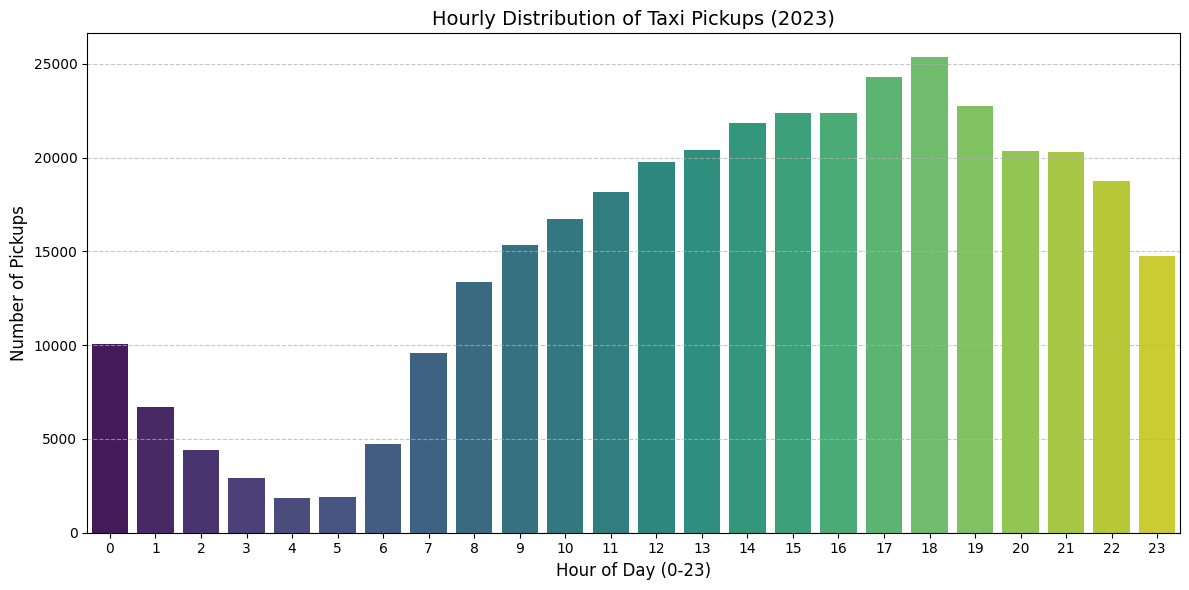

In [90]:
# Tintu: Creating barplot to see the distribution of pickups in different hours

plt.figure(figsize=(12,6))
sns.barplot(x=pickup_by_hour.index, y=pickup_by_hour.values, palette="viridis")
plt.title("Hourly Distribution of Taxi Pickups (2023)", fontsize=14)
plt.xlabel("Hour of Day (0-23)", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observation:
##### Tintu: The Least pickups are in the 4th and 5th hours
##### Tintu: Peak pickups are during the 18th hour
##### Tintu: There could be possibilities that during the 18th hour, there shall be rush hour charges and congestion charges coming into the fare

In [91]:
# Find and show the daily trends in taxi pickups (days of the week)

# Tintu: Creating a new column "pickup_day" to extract the day of the week from the column "tpep_pickup_datetime"
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()

In [92]:
# Tintu: Grouping by pickup_day and counting number of trips
day_counts = df["pickup_day"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()
day_counts.columns = ["pickup_day", "trip_count"] # Tintu: Renaming the columns index, pickup_day to pickup_day and trip_count

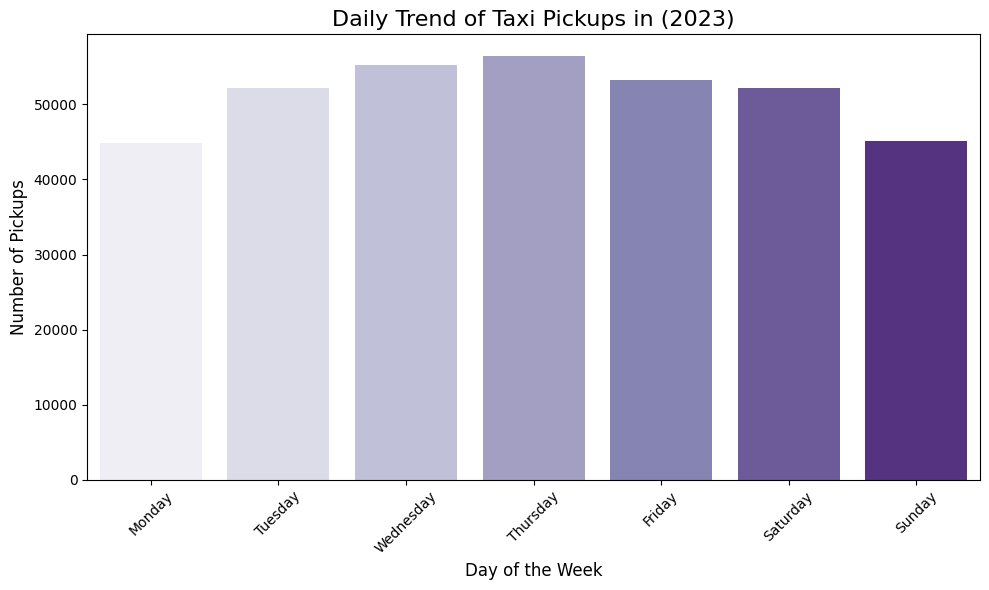

In [93]:
# Tintu: Plotting the results in barplot to see the distribution across the days in a week
plt.figure(figsize=(10, 6))
sns.barplot(x="pickup_day", y="trip_count", data=day_counts, palette="Purples")
plt.title("Daily Trend of Taxi Pickups in (2023)", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation:
##### Tintu: The trend shows that the fewest pickups based on the overall count in a week are on Monday and Sunday
##### TIntu: The highest pickup trend in a week is on Thursday ( Surprising to see a higher pickup trend in a weekday)


In [94]:
# Show the monthly trends in pickups

# Tintu: Creating a new column "pickup_month" to extract the month from "tpep_pickup_datetime"
df["pickup_month"] = df["tpep_pickup_datetime"].dt.month_name()

In [95]:
# Tintu: Counting the number of trips per month and preserving calendar order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

month_counts = df["pickup_month"].value_counts().reindex(month_order).reset_index()
month_counts.columns = ["pickup_month", "trip_count"]

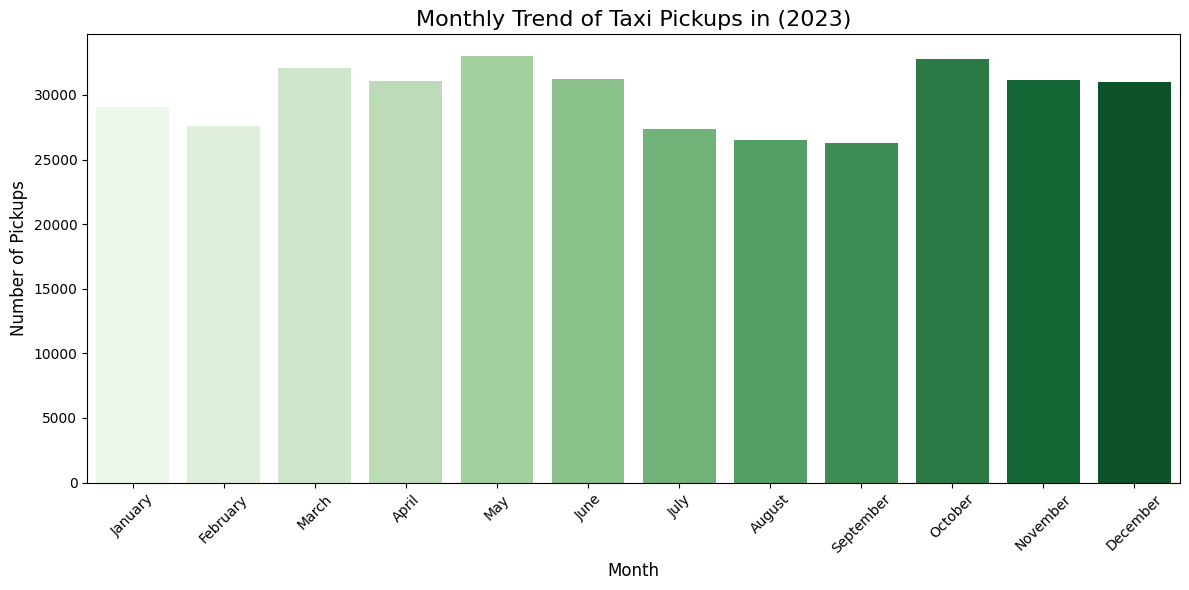

In [96]:
# Tintu: Plotting the results in barplot to see the monthly distribution
plt.figure(figsize=(12, 6))
sns.barplot(x="pickup_month", y="trip_count", data=month_counts, palette="Greens")
plt.title("Monthly Trend of Taxi Pickups in (2023)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation
##### Tintu: The trend shows that the fewest trip counts are in September and August months
##### Tintu: Also, the trend reveals that the highest trip counts are recorded in October. May month also has peak records of trip counts


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [97]:
# Analyse the above parameters

# Tintu: Checking for zero or negative values in key financial columns
financial_columns = ["fare_amount", "total_amount", "trip_distance", "mta_tax" ]

for col in financial_columns:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: Zero Values = {zero_count}, Negative Values = {negative_count}")

fare_amount: Zero Values = 94, Negative Values = 0
total_amount: Zero Values = 45, Negative Values = 0
trip_distance: Zero Values = 3512, Negative Values = 0
mta_tax: Zero Values = 2721, Negative Values = 0


#### Observation
##### Tintu: If I consider all financial columns, then the data set will be squeezed to the shape: (8507, 23). Which is very low to operate.
##### Tintu: Considering major financial columns. "fare_amount", "total_amount", "mta_tax", and "trip_distance"
##### Tintu: The "tip_amount" column can have zero because it's based on the customer's emotion. Having zero in this column is normal
##### Tintu: Many zero values, but the negative values are zero in the DataFrame "df" now.

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

##### Tintu: In general, yes, but it depends on the context. For example, in the case of tip_amount, it's very normal that sometimes the customer won't tip. Still, that overall trip is valid and sane data

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [98]:
# Create a df with non-zero entries for the selected parameters.

#Tintu: Creating mask: keep rows where the "financial_columns" are > 0
non_zero_mask = (df[financial_columns] > 0).all(axis=1)

# Tintu: Filtering the new DataFrame with non_zero values in manjor finacial columns
df_financial = df[non_zero_mask].copy()

# Tintu: The new shape is:
print("Shape of financial DataFrame (df_financial):", df_financial.shape)


Shape of financial DataFrame (df_financial): (353669, 23)


#### Answer: New non_zero DataFrame created: "df_financial"

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [99]:
# Group data by month and analyse monthly revenue

# Tintu: Defining correct month order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Tintu: Grouping by pickup_month and summing the total revenue
monthly_revenue = df_financial.groupby("pickup_month")["total_amount"].sum().reindex(month_order).reset_index()

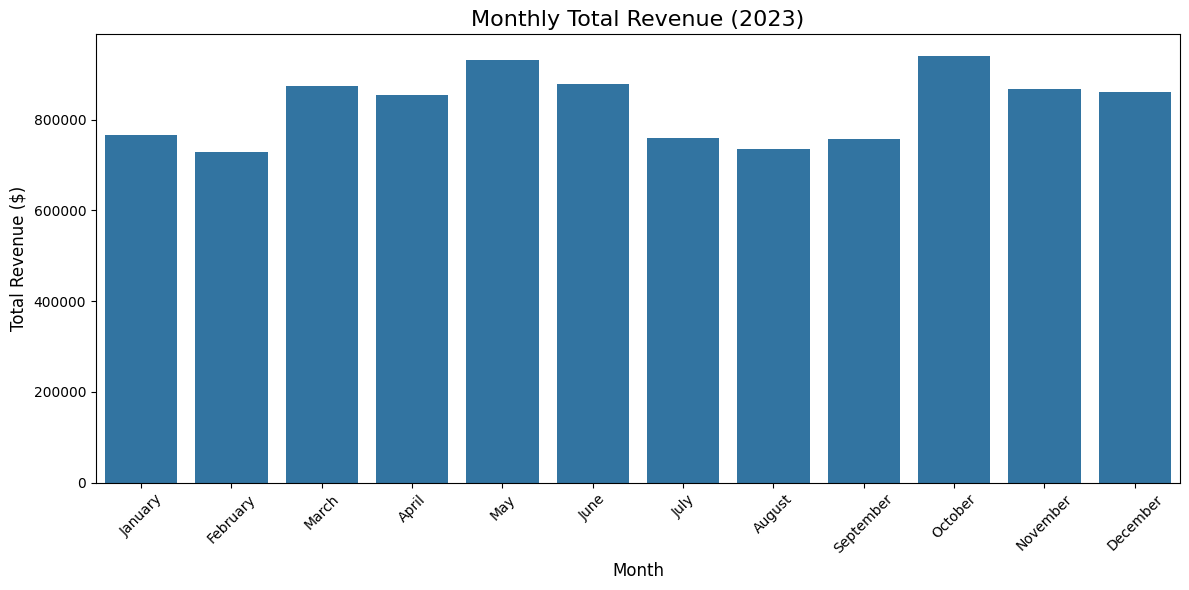

In [100]:
# Tintu: Plotting monthly revenue trend against each month
plt.figure(figsize=(12, 6))
sns.barplot(x="pickup_month", y="total_amount", data=monthly_revenue)
plt.title("Monthly Total Revenue (2023)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation:
##### Tintu: Max revenue from October and May month. It makes sense since max number of taxi pickups are in these months
##### Tintu: The least revenue is collected in the months of February and August

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [101]:
# Calculate proportion of each quarter

# Tintu: Creating a new column for quarter based on pickup datetime
df_financial["pickup_quarter"] = df_financial["tpep_pickup_datetime"].dt.to_period("Q").astype(str)

# Tintu: Grouping by quarter and summing the total revenue
quarterly_revenue = df_financial.groupby("pickup_quarter")["total_amount"].sum().reset_index()


In [102]:
# Tintu: Calculating the proportion of each quarter
total_annual_revenue = quarterly_revenue["total_amount"].sum()
quarterly_revenue["revenue_proportion"] = (quarterly_revenue["total_amount"] / total_annual_revenue) * 100

# Tintu: Display the results
print("Quarterly Revenue:\n", quarterly_revenue)

Quarterly Revenue:
   pickup_quarter  total_amount  revenue_proportion
0         2023Q1    2370445.30           23.808557
1         2023Q2    2663640.39           26.753384
2         2023Q3    2252527.32           22.624198
3         2023Q4    2669661.59           26.813861


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [103]:
# Show how trip fare is affected by distance

# Tintu: the df_financial has no "trip_distance" where the value is zero. We already dropped it.

# Tintu: Calculating the correlation
correlation = df_financial["trip_distance"].corr(df_financial["fare_amount"])
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")

Correlation between trip_distance and fare_amount: 0.96


#### Tintu: Correlation between trip_distance and fare_amount: 0.96

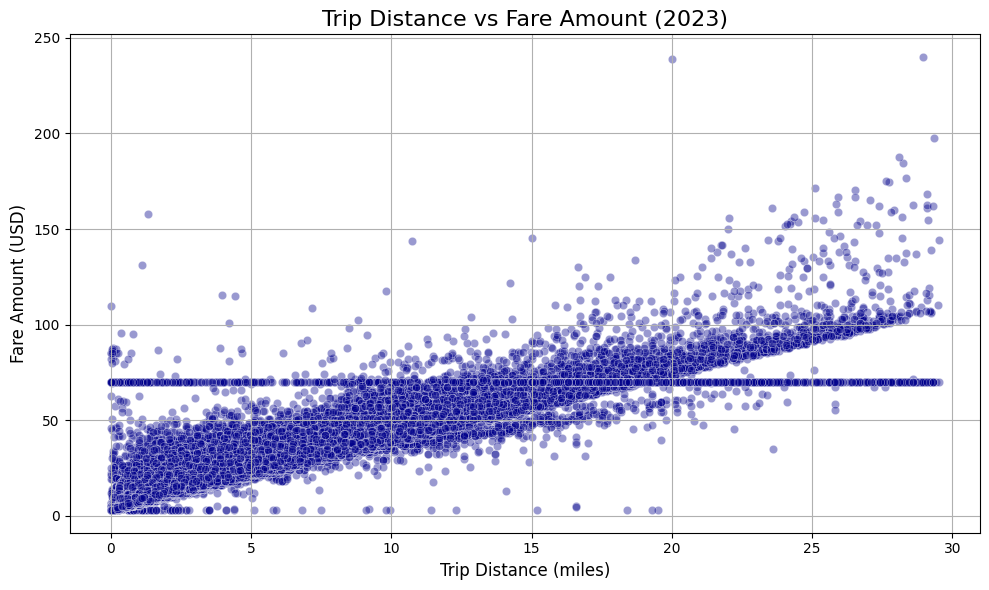

In [104]:
# Tintu: Scatter plot of trip_distance vs fare_amount from df_financial

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_financial,
    x="trip_distance",
    y="fare_amount",
    alpha=0.4,
    color="darkblue"
)
plt.title("Trip Distance vs Fare Amount (2023)", fontsize=16)
plt.xlabel("Trip Distance (miles)", fontsize=12)
plt.ylabel("Fare Amount (USD)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observation:
##### Tintu: The trend is, as the Trip distance increases, the Fare increases
##### Tintu: The majority of the trips fall below 15 miles

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [105]:
# Show relationship between fare and trip duration

# Tintu: Calculating correlation between fare_amount and trip_duration
correlation_1 = df_financial["fare_amount"].corr(df_financial["trip_duration"])
print(f"Correlation between fare_amount and trip_duration: {correlation_1:.2f}")

Correlation between fare_amount and trip_duration: 0.28


#### Correlation between fare_amount and trip_duration: 0.28

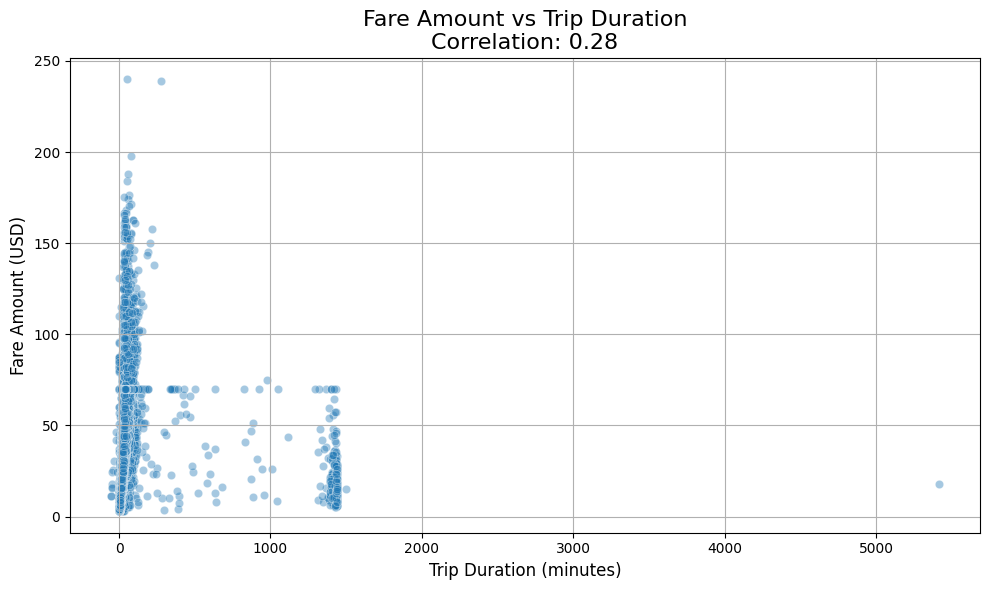

In [106]:
# Tintu: Scatter plot for fare_amount vs trip_duration
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_financial,
    x="trip_duration",
    y="fare_amount",
    alpha=0.4
)
plt.title(f"Fare Amount vs Trip Duration\nCorrelation: {correlation_1:.2f}", fontsize=16)
plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Fare Amount (USD)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observation
##### Tintu: correlation value is 0.28, which shows a weak proportional relationship between the time and fare

In [107]:
# Show relationship between fare and number of passengers

# Tintu: Calculating the correlation between fare_amount and passenger_count
correlation_fp = df_financial["fare_amount"].corr(df_financial["passenger_count"])
print(f"Correlation between fare_amount and passenger_count: {correlation_fp:.2f}")

Correlation between fare_amount and passenger_count: 0.04


#### Correlation between fare_amount and passenger_count: 0.04

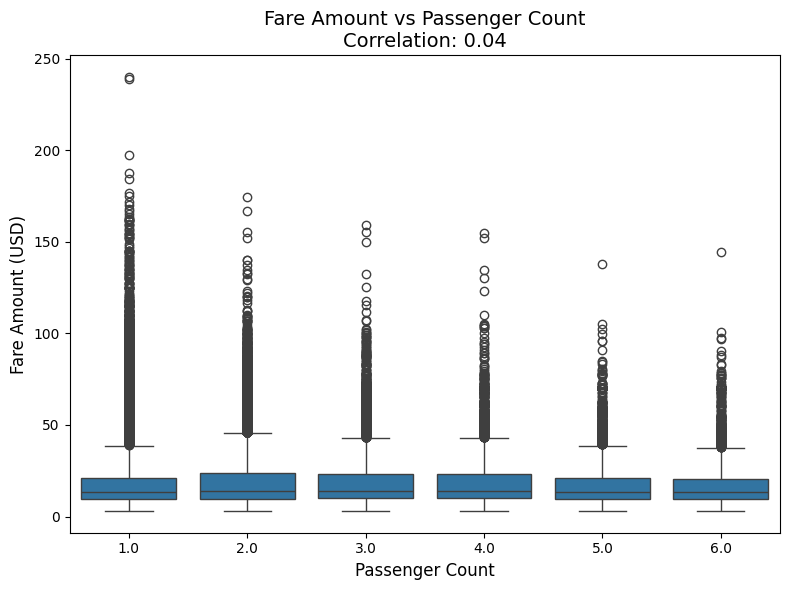

In [108]:
# Tintu: Scatter plot to visualize the relationship

plt.figure(figsize=(8, 6))
sns.boxplot(
    x="passenger_count",
    y="fare_amount",
    data=df_financial
)
plt.title(f"Fare Amount vs Passenger Count\nCorrelation: {correlation_fp:.2f}", fontsize=14)
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Fare Amount (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [109]:
df_financial.groupby("passenger_count")["fare_amount"].describe().sort_values(by = "mean", ascending = False )

count       mean        std  min   25%   50%   75%    max
passenger_count                                                              
2.0               54091.0  21.346677  18.586126  3.0   9.3  14.2  24.0  174.5
4.0                7305.0  21.188181  18.111298  3.0  10.0  14.2  23.3  154.9
3.0               13353.0  20.718603  17.730520  3.0  10.0  14.2  23.3  159.1
6.0                3150.0  18.689683  15.799054  3.0   9.3  13.5  20.5  144.4
1.0              271064.0  18.551458  15.485135  3.0   9.3  13.5  21.2  240.0
5.0                4706.0  18.503400  15.152948  3.0   9.3  13.5  21.2  138.1

#### Observation:
##### Tintu: Outliers are higher when passenger count is one. The identified max fare value is 240 and the number of passenger is 1

In [110]:
# Show relationship between tip and trip distance

# Tintu: Calculating the correlation between tip_amount and trip_distance
correlation_td = df_financial["tip_amount"].corr(df_financial["trip_distance"])
print(f"Correlation between tip_amount and trip_distance: {correlation_td:.2f}")

Correlation between tip_amount and trip_distance: 0.59


#### Correlation between tip_amount and trip_distance: 0.59

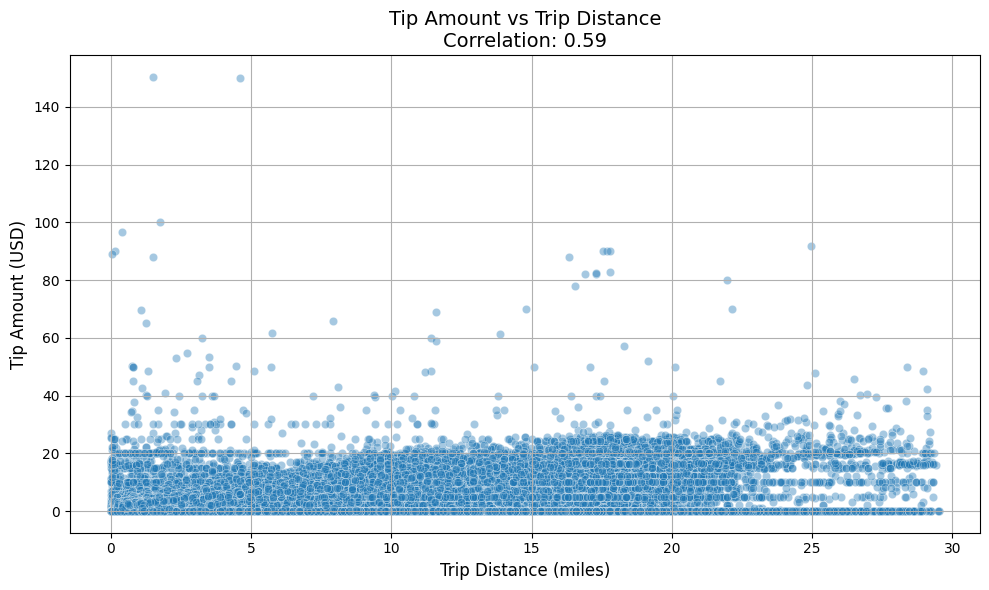

In [111]:
# Tintu: Scatter plot to visualize the relationship between tip and distance

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="trip_distance",
    y="tip_amount",
    data=df_financial,
    alpha=0.4
)
plt.title(f"Tip Amount vs Trip Distance\nCorrelation: {correlation_td:.2f}", fontsize=14)
plt.xlabel("Trip Distance (miles)", fontsize=12)
plt.ylabel("Tip Amount (USD)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observation:
##### Tintu: Most of the tip amount falls below 20 $
##### Tintu: can observe a slight incremental trend on tip amount as the trip distance increases

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [112]:
# Analyse the distribution of different payment types (payment_type).


# Tintu: Mapping payment_type codes to their descriptions ( Including all as per the data dictionary)

payment_type_mapping = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

# Tintu: Count occurrences of each payment_type (only those present in df_financial)
payment_counts = df_financial["payment_type"].value_counts().sort_index()

# Tintu: Convert to DataFrame and include missing types of 5 and 6
payment_counts = payment_counts.reindex(range(1, 7), fill_value=0)

In [113]:
# Tintu: Convert to DataFrame for plotting
payment_df = pd.DataFrame({
    "payment_type_code": payment_counts.index,
    "trip_count": payment_counts.values,
    "payment_type": payment_counts.index.map(payment_type_mapping)
})

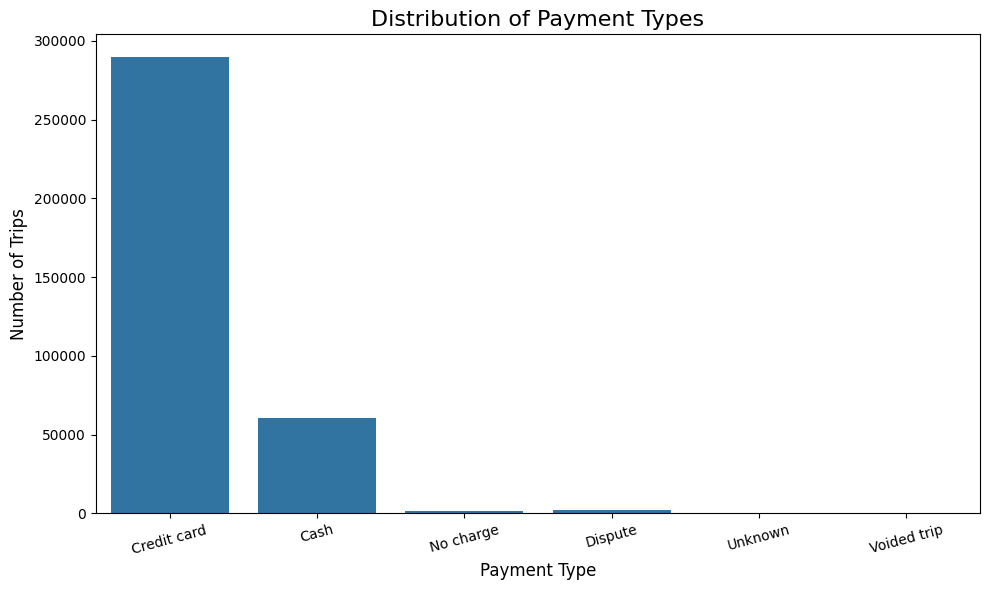

In [114]:
# Tintu: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=payment_df,
    x="payment_type",
    y="trip_count")

plt.title("Distribution of Payment Types", fontsize=16)
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#### Observation:
##### Tintu: Majority of the transactions are via credit card

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [115]:
# !pip install geopandas # Tintu: I use anaconda and sometime the pip installation create issues, So need to use conda prompt

In [116]:
# Tintu: Importing geopandas and checking its version

import geopandas as gpd
print("GeoPandas version:", gpd.__version__)

GeoPandas version: 1.1.1


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [117]:
# import geopandas as gpd


# Read the shapefile using geopandas
# read the .shp file using gpd
zones = gpd.read_file(r"C:\TINTU KURIAN\DATA SCIENCE COURSE - UPGRAD\GRADED QUESTION\2025 - July 08 deadline - NYC taxi\Datasets and Dictionary-NYC\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [118]:
# print(zones.info())
# zones.plot()

In [119]:
print(zones.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


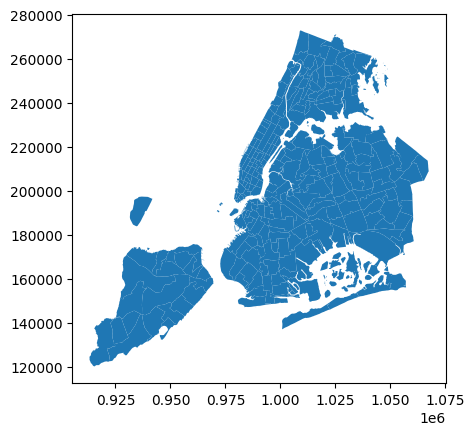

In [120]:
zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [130]:
# Merge zones and trip records using locationID and PULocationID
# Tintu: Creating a new dataframe "df_zone" to create the combined result from df and zones based on the locationID and PUlocationID.

df_zone = df.merge(
    zones,
    how="left",
    left_on="PULocationID",
    right_on="LocationID"
)

In [131]:
df_zone.shape

(359271, 30)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [138]:
# Group data by location and calculate the number of trips
# Tintu: Storing the trip counts based on the locationID, under the column name: "trip_count"

trip_counts_by_pickup = df_zone.groupby("LocationID").size().reset_index(name="trip_count")
trip_counts_by_pickup

LocationID  trip_count
0           1.0          17
1           3.0          10
2           4.0         352
3           5.0           2
4           6.0           4
..          ...         ...
235       259.0           7
236       260.0          70
237       261.0        1859
238       262.0        4558
239       263.0        6838

[240 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [133]:
# Merge trip counts back to the zones GeoDataFrame

# Tintu: Creating a new dataframe "zones_with_trips" by merging "zones and trip_counts_by_pickup"
zones_with_trips = zones.merge(trip_counts_by_pickup, how="left", on="LocationID")

#Tintu: filling the locations with zero where there is no pickups or trip starts
zones_with_trips["trip_count"] = zones_with_trips["trip_count"].fillna(0).astype(int)


In [134]:
zones_with_trips.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
 7   trip_count  263 non-null    int32   
dtypes: float64(2), geometry(1), int32(3), object(2)
memory usage: 13.5+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

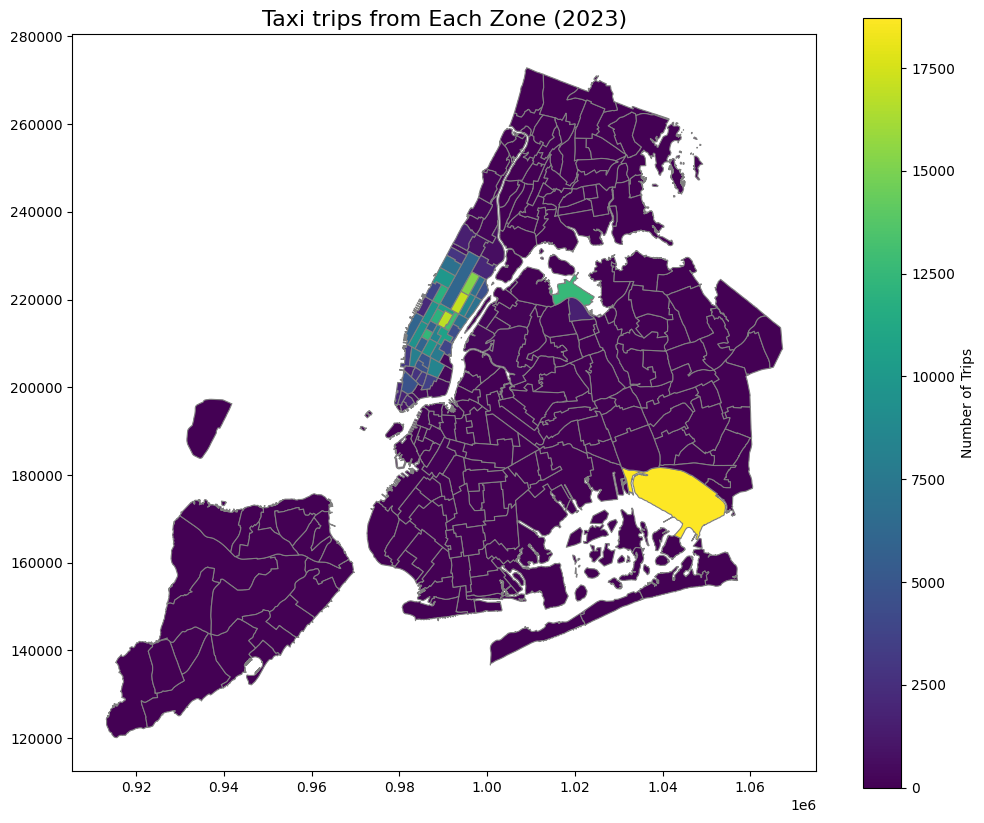

In [136]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it

zones_with_trips.plot(
    column="trip_count",
    cmap="viridis",  
    linewidth=0.8,
    edgecolor="gray",
    ax=ax,
    legend=True,
    legend_kwds={"label": "Number of Trips", "orientation": "vertical"}
)
plt.title("Taxi trips from Each Zone (2023)", fontsize=16)
plt.show()


#### Observation:
##### Tintu: The number of trips based on the pickup_location is amlost evenly distributed across NYC except a few taxi zones.
##### Tintu: This could be due to the non-availability of other transportation methods like metro, local train etc.

In [137]:
# can you try displaying the zones DF sorted by the number of trips?

# Tintu: Please note that I have created a new dataframe "zones_with_trips" instead of combining it all into the original "zone" dataframe file.

zones_with_trips[["LocationID", "zone", "borough", "trip_count"]].sort_values("trip_count", ascending=False).head(10)

LocationID                          zone    borough  trip_count
131         132                   JFK Airport     Queens       18722
236         237         Upper East Side South  Manhattan       17079
160         161                Midtown Center  Manhattan       16844
235         236         Upper East Side North  Manhattan       15234
161         162                  Midtown East  Manhattan       12997
137         138             LaGuardia Airport     Queens       12521
185         186  Penn Station/Madison Sq West  Manhattan       12419
229         230     Times Sq/Theatre District  Manhattan       11961
141         142           Lincoln Square East  Manhattan       11861
169         170                   Murray Hill  Manhattan       10660

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


### COMPILED OBSERVATIONS - FROM TINTU

#### Business Hours: 
* The Least pickups are in the 4th and 5th hours. Peak pickups are during the 18th hour
* There could be possibilities that during the 18th hour, there shall be rush hour charges and congestion charges coming into the fare
#### Days of the week
* The trend shows that the fewest pickups based on the overall count in a week are on Monday and Sunday
* The highest pickup trend in a week is on Thursday (Surprisingly, the highest pickup trend is on a weekday)
#### Months of 2023
* The trend shows that the fewest trip counts are in the "September and August" months
* Also, the trend reveals that the highest trip counts are recorded in October. "May" month also has peak records of trip counts

#### Trends in revenue collected
* Max revenue from "October and May" months. It makes sense since max number of taxi pickups is in these months
* The least revenue is collected in February and August

#### How fare depends on trip distance, trip duration, and passenger counts
* Fare Vs trip distance: The trend is, as the Trip distance increases, the Fare increases, but not steeply. The majority of the trips fall below 15 miles
* Fare Vs trip duration: The correlation value is 0.2,8, which shows a weak proportional relationship between the time and fare. Looks like fare is more proportionally related to the trip distance
* Tip amount Vs trip distance: Most of the tip amount falls below 20 $. We can observe a "slight" incremental trend in tip amount as the trip distance increases
  
#### Busiest zones
* The busiest zones are JFK Airport (18722 trips) in Queens borough and Upper East Side South (17079 trips) in Manhattan borough


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [139]:
# Tintu: In the analysis, I found that there are a few rows (11 rows) where the pickup time is after the dropoff time. 
# Tintu: Which is clearly an invalid condition. So, dropping those 11 rows from "df_zone"

df_zone[df_zone["tpep_dropoff_datetime"] < df_zone["tpep_pickup_datetime"]].shape

(11, 30)

In [140]:
df_zone.shape

(359271, 30)

In [141]:
#Tintu: dripping the 11 rows that are invalid due to the wrong pickup time or drop time recorded
df_zone = df_zone[df_zone["tpep_dropoff_datetime"] >= df_zone["tpep_pickup_datetime"]]

In [142]:
df_zone.shape  # Tintu: confirming that 11 rows dropped

(359260, 30)

In [143]:
# Find routes that have the slowest speeds at different times of the day

# Find routes that have the slowest speeds at different times of the day
# Tintu: Operating on the datframe df_zone.

df_zone["trip_duration_hr"] = df_zone["trip_duration"] / 60  # Tintu: creating a new column to calculate the trip duration in hours

#Tintu: Group by pickup, dropoff, and hour to compute average distance and average duration
route_speed_by_hour = df_zone.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(avg_distance=("trip_distance", "mean"),avg_duration_hr=("trip_duration_hr", "mean")).reset_index()

#Tintu: Calculate average speed in miles per hour
route_speed_by_hour["avg_speed_mph"] = (route_speed_by_hour["avg_distance"] / route_speed_by_hour["avg_duration_hr"])

In [144]:
# Tintu: Removing divisions by zero and invalid values
route_speed_by_hour = route_speed_by_hour.replace([float("inf"), -float("inf")], None).dropna()

In [145]:
# Tintu: Sort by slowest routes (lowest average speed)
slowest_routes = route_speed_by_hour.sort_values("avg_speed_mph")
slowest_routes.sort_values(by = "avg_duration_hr", ascending =False).head(10)

PULocationID  DOLocationID  pickup_hour  avg_distance  avg_duration_hr  \
51288           226           145           18          1.20        45.165000   
46930           181           132           20          2.29        24.996944   
35693           148            33           17          2.48        23.975833   
35935           148            88           20          2.48        23.974444   
30408           140           209            8          6.14        23.953611   
5217             48           145           16          4.05        23.938889   
61164           238            51           11         14.44        23.923611   
13673            88             1           17         14.85        23.920000   
15184            90           223           20          6.95        23.911944   
21897           125           256           17          4.04        23.900833   

      avg_speed_mph  
51288      0.026569  
46930      0.091611  
35693      0.103437  
35935      0.103443  
30408      0.256329  
5217       0.169181  
61164      0.603588  
13673      0.620819  
15184       0.29065  
21897      0.169032

In [146]:
# Step 1: Create mapping for PU and DO zones
pu_zone_map = df_zone[["PULocationID", "zone"]].dropna().drop_duplicates().rename(columns={"zone": "PU_zone"})
do_zone_map = df_zone[["DOLocationID", "zone"]].dropna().drop_duplicates().rename(columns={"zone": "DO_zone"})

# Step 2: Merge the names into your final result
slowest_routes_named = slowest_routes \
    .merge(pu_zone_map, on="PULocationID", how="left") \
    .merge(do_zone_map, on="DOLocationID", how="left")

# Step 3: Display with readable zones
slowest_routes_named[[
    "PU_zone", "DO_zone", "pickup_hour", "avg_distance", "avg_duration_hr", "avg_speed_mph"
]].sort_values(by="avg_duration_hr", ascending=False).head(10)

PU_zone                    DO_zone  pickup_hour  avg_distance  \
34414  Sunnyside       TriBeCa/Civic Center           18           1.2   
34412  Sunnyside    Greenwich Village South           18           1.2   
34411  Sunnyside          East Williamsburg           18           1.2   
34415  Sunnyside                   Union Sq           18           1.2   
34416  Sunnyside             Midtown Center           18           1.2   
34417  Sunnyside      Upper West Side South           18           1.2   
34418  Sunnyside   Financial District North           18           1.2   
34419  Sunnyside  Times Sq/Theatre District           18           1.2   
34420  Sunnyside             Yorkville West           18           1.2   
34421  Sunnyside            Lower East Side           18           1.2   

       avg_duration_hr avg_speed_mph  
34414           45.165      0.026569  
34412           45.165      0.026569  
34411           45.165      0.026569  
34415           45.165      0.026569  
34416           45.165      0.026569  
34417           45.165      0.026569  
34418           45.165      0.026569  
34419           45.165      0.026569  
34420           45.165      0.026569  
34421           45.165      0.026569

#### ANSMWER: 3.2.1: Observation:
##### Tintu: All the major slow-speed routes start from "Sunnyside". The average duration is ~45 hours for completion.
##### Tintu: I will have to doubt the data accuracy. But the analysis report the same.

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [150]:
# Tintu: Counting the number of trips per hour
trips_by_hour = df_zone["pickup_hour"].value_counts().sort_index()

# Tintu: Scaling up to get the actual figure size of the trips ( Sampling: 1%, actual dataframe size = (359245, 19) )

trips_by_hour_scaled = trips_by_hour * 100

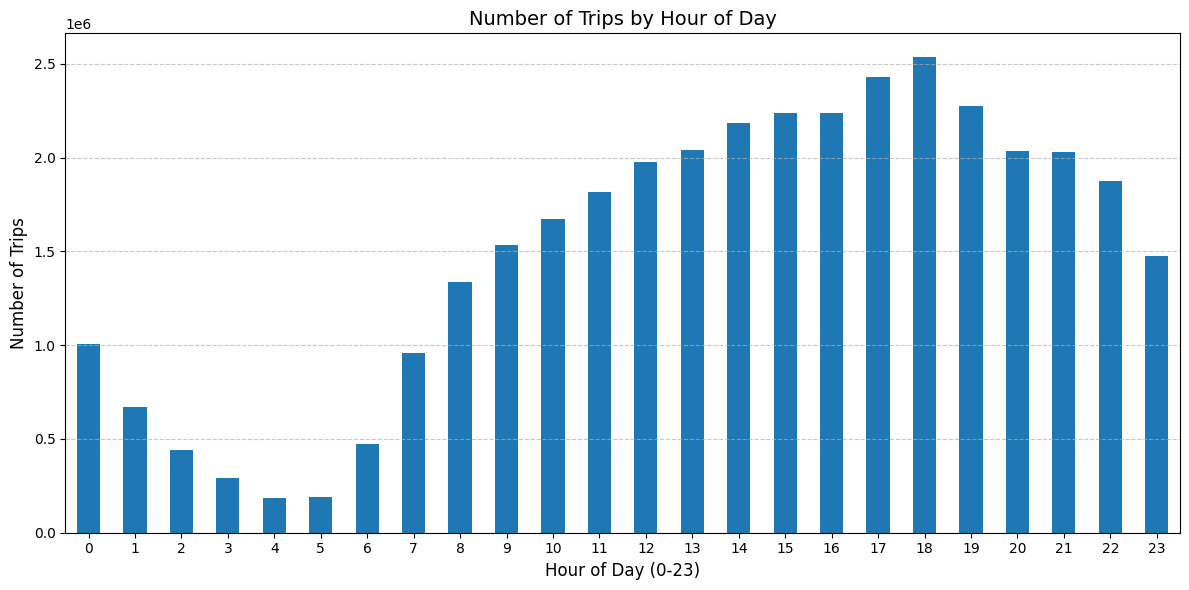

In [151]:
# Tintu: Plot the number of trips per hour

plt.figure(figsize=(12, 6))
trips_by_hour_scaled.plot(kind="bar")
plt.title("Number of Trips by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (0-23)", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [152]:
# Tintu: Find the busiest hour
busiest_hour = trips_by_hour_scaled.idxmax()
busiest_count = trips_by_hour_scaled.max()
print(f"Busiest hour: {busiest_hour} (Total trips: {busiest_count})")

Busiest hour: 18 (Total trips: 2536100)


#### 3.2.2. ANSWER: Busiest hour: 18 (Total trips: 2536100)

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [153]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.001 # Sampling factor that I hvae used to generate the df. I just calculated the scaled hours in 3.2.2. Using it here

# Tintu: Get top 5 busiest hours from the scaled trip counts
top_5_hours_scaled = trips_by_hour_scaled.sort_values(ascending=False).head(5)

print("Estimated Total Trips in the Five Busiest Hours:", top_5_hours_scaled)


Estimated Total Trips in the Five Busiest Hours: pickup_hour
18    2536100
17    2428200
19    2277200
15    2239900
16    2238300
Name: count, dtype: int64


#### 3.2.3: Answer: Estimated Total Trips in the Five Busiest Hours: 18th-2536100, 17th-2428200, 19th-2277200, 15th-2239900, 16th-2238300

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [154]:
# Compare traffic trends for the week days and weekends

# Tintu: Create a new column marking Weekday vs Weekend
df_zone["day_type"] = df_zone["pickup_day"].apply(lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday")

# Tintu: Group by day type and pickup_hour
hourly_traffic = df_zone.groupby(["day_type", "pickup_hour"]).size().reset_index(name="trip_count")

# Tintu: Scale up using sampling factor (1%)
hourly_traffic["trip_count"] = hourly_traffic["trip_count"] * 100


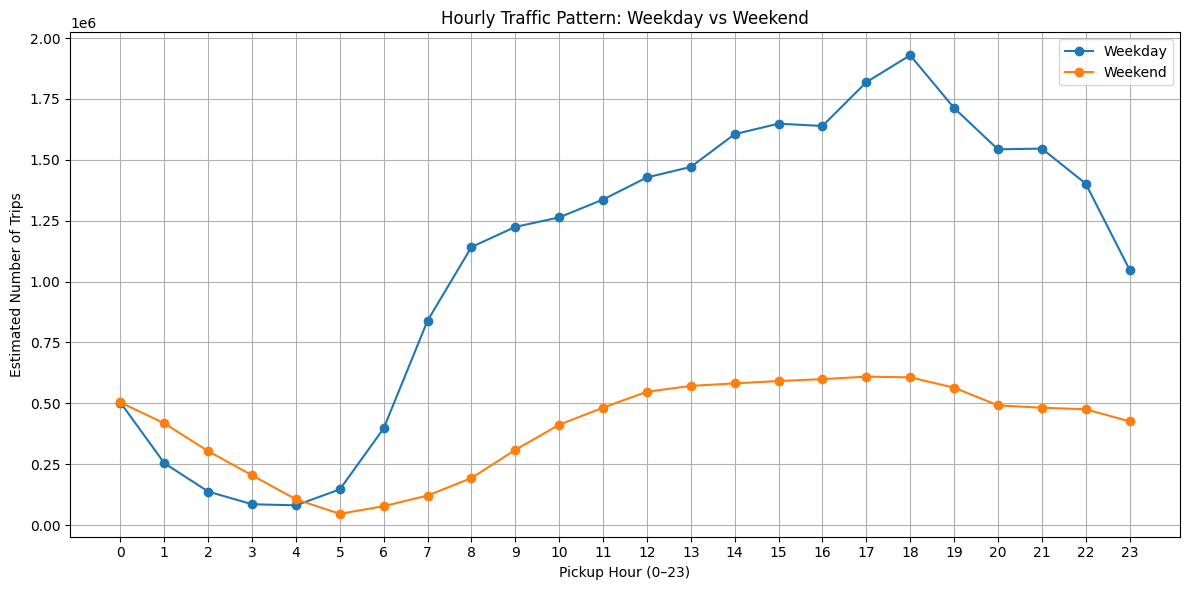

In [155]:
# Tintu: Plot the comparison
plt.figure(figsize=(12, 6))
for day_type in ["Weekday", "Weekend"]:
    subset = hourly_traffic[hourly_traffic["day_type"] == day_type]
    plt.plot(subset["pickup_hour"], subset["trip_count"], marker="o", label=day_type)

plt.title("Hourly Traffic Pattern: Weekday vs Weekend")
plt.xlabel("Pickup Hour (0–23)")
plt.ylabel("Estimated Number of Trips")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3.2.4: Answer: The observation is, the estimated number of trips is very high during the weekdays. The only difference we can see on the early morning, where the estimated number of trips is higher on weekends. Depending on the trip time, we should be cautious based on the traffic trend and the time it will take to arrive at the destination. It is much better to plan a trip morning rather than at any other time of day

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [156]:
# Find top 10 pickup zones

pickup_counts = df_zone.groupby("PULocationID").size().reset_index(name="pickup_count")
pickup_counts = pickup_counts.merge(df_zone[["PULocationID", "zone"]].drop_duplicates(), on="PULocationID", how="left")

top_10_pu_zones = pickup_counts.sort_values("pickup_count", ascending=False).head(10)
top_10_pu_zones[["zone", "pickup_count"]]

zone  pickup_count
116                   JFK Airport         18722
215         Upper East Side South         17079
144                Midtown Center         16844
214         Upper East Side North         15234
145                  Midtown East         12996
122             LaGuardia Airport         12521
166  Penn Station/Madison Sq West         12418
208     Times Sq/Theatre District         11961
126           Lincoln Square East         11861
153                   Murray Hill         10660

In [157]:
# Find top 10 dropoff zones

dropoff_counts = df_zone.groupby("DOLocationID").size().reset_index(name="dropoff_count")
dropoff_counts = dropoff_counts.merge(df_zone[["DOLocationID", "zone"]].drop_duplicates(), on="DOLocationID", how="left")

top_10_do_zones = dropoff_counts.sort_values("dropoff_count", ascending=False).head(10)
top_10_do_zones[["zone", "dropoff_count"]]

zone  dropoff_count
9128  Penn Station/Madison Sq West          16051
9140          TriBeCa/Civic Center          16051
9148                 Alphabet City          16051
9147                       Astoria          16051
9146             East Williamsburg          16051
9145           Little Italy/NoLiTa          16051
9144                          SoHo          16051
9143            World Trade Center          16051
9142                     Hudson Sq          16051
9141             Battery Park City          16051

In [158]:
# Tintu: Visualize Hourly Pickup Trends

# Filter data to only include top 10 pickup zones
top_pu_zone_names = top_10_pu_zones["zone"].unique()
pickup_data = df_zone[df_zone["zone"].isin(top_pu_zone_names)]

# Tintu: Group by pickup hour and zone
pickup_hourly = pickup_data.groupby(["pickup_hour", "zone"]).size().reset_index(name="pickup_count")


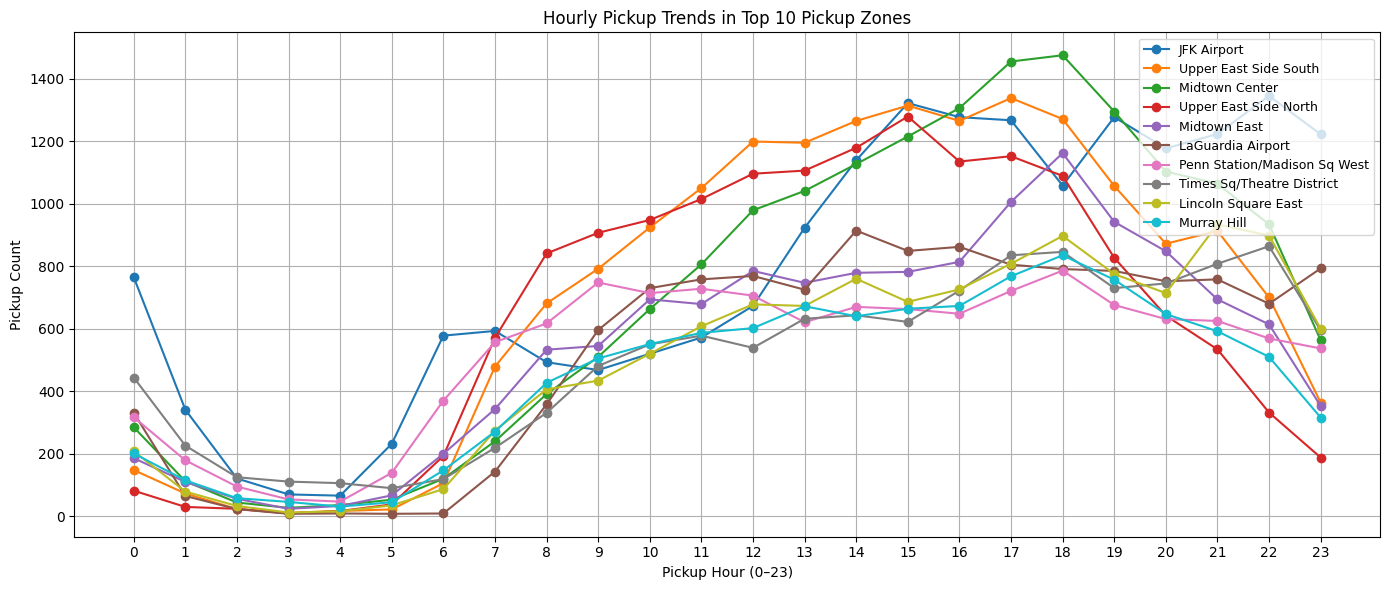

In [159]:
# Tintu: Plot hourly pickups

plt.figure(figsize=(14, 6))
for zone in top_pu_zone_names:
    zone_data = pickup_hourly[pickup_hourly["zone"] == zone]
    plt.plot(zone_data["pickup_hour"], zone_data["pickup_count"], marker="o", label=zone)

plt.title("Hourly Pickup Trends in Top 10 Pickup Zones")
plt.xlabel("Pickup Hour (0–23)")
plt.ylabel("Pickup Count")
plt.xticks(range(0, 24))
plt.legend(loc="upper right", fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

In [160]:
# Tintu: Visualize Hourly drop-off Trends

top_do_zone_names = top_10_do_zones["zone"].unique()
dropoff_data = df_zone[df_zone["zone"].isin(top_do_zone_names)]

# Tintu: Group by pickup hour and zone (pickup_hour is the same for dropoff time here - Just to have an hour pattern)
dropoff_hourly = dropoff_data.groupby(["pickup_hour", "zone"]).size().reset_index(name="dropoff_count")

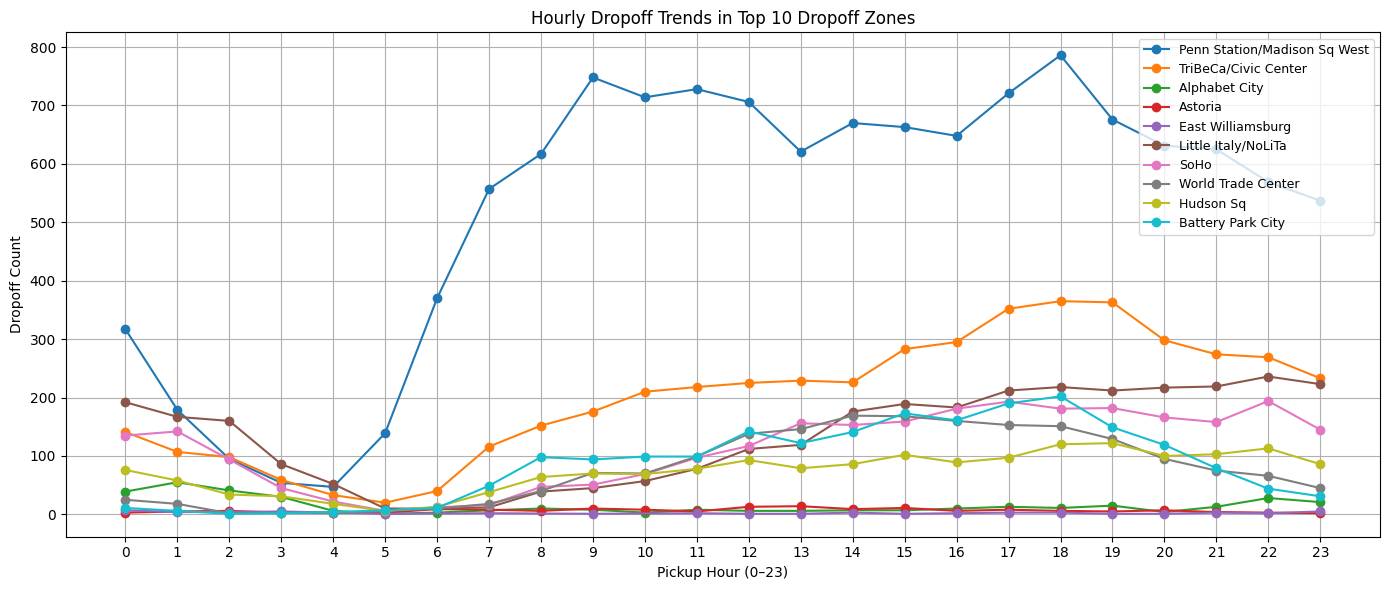

In [161]:
# Tintu: Plot hourly dropoffs

plt.figure(figsize=(14, 6))
for zone in top_do_zone_names:
    zone_data = dropoff_hourly[dropoff_hourly["zone"] == zone]
    plt.plot(zone_data["pickup_hour"], zone_data["dropoff_count"], marker="o", label=zone)

plt.title("Hourly Dropoff Trends in Top 10 Dropoff Zones")
plt.xlabel("Pickup Hour (0–23)")
plt.ylabel("Dropoff Count")
plt.xticks(range(0, 24))
plt.legend(loc="upper right", fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3.2.5 ANSWER:
##### - Top 10 pickup locations are: JFK Airport, Upper East Side South, Midtown Center, Upper East Side North, Midtown East, LaGuardia Airport, 
#####   Penn Station/Madison Sq West, Times Sq/Theatre District, Lincoln Square East, Murray Hill
##### - Penn Station/Madison Sq West, TriBeCa/Civic Center, Alphabet City, Astoria, East Williamsburg, 
#####   Little Italy/NoLiTa, SoHo, World Trade Center, Hudson Sq, Battery Park City

##### - On the 18th hour, "Midtown center" has the highest pickup trends
##### - The dropoff trend shows that the hourly highest drop trend is at Penn Station/Madison Sq West


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [162]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Tintu: Counting pickups and dropoffs by zone
pickup_counts = df_zone.groupby("zone")["PULocationID"].count().reset_index(name="pickup_count")
dropoff_counts = df_zone.groupby("zone")["DOLocationID"].count().reset_index(name="dropoff_count")

# Tintu: Merge counts into one DataFrame
zone_ratios = pickup_counts.merge(dropoff_counts, on="zone", how="inner")

# Tintu: Calculate pickup to dropoff ratio
zone_ratios["pickup_dropoff_ratio"] = zone_ratios["pickup_count"] / zone_ratios["dropoff_count"]

# Tintu: Sort to get top 10 and bottom 10 ratios
top_10_ratios = zone_ratios.sort_values("pickup_dropoff_ratio", ascending=False).head(10)
bottom_10_ratios = zone_ratios.sort_values("pickup_dropoff_ratio", ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
display(top_10_ratios)

print("Bottom 10 Pickup/Dropoff Ratios:")
display(bottom_10_ratios)

Top 10 Pickup/Dropoff Ratios:


zone  pickup_count  dropoff_count  \
0    Allerton/Pelham Gardens            10             10   
1              Alphabet City           352            352   
152       Murray Hill-Queens             4              4   
153           Newark Airport            17             17   
154             North Corona            12             12   
155                  Norwood            14             14   
156          Oakland Gardens             9              9   
157               Ocean Hill            20             20   
158      Ocean Parkway South             2              2   
159              Old Astoria            49             49   

     pickup_dropoff_ratio  
0                     1.0  
1                     1.0  
152                   1.0  
153                   1.0  
154                   1.0  
155                   1.0  
156                   1.0  
157                   1.0  
158                   1.0  
159                   1.0

Bottom 10 Pickup/Dropoff Ratios:


zone  pickup_count  dropoff_count  \
0    Allerton/Pelham Gardens            10             10   
152       Murray Hill-Queens             4              4   
153           Newark Airport            17             17   
154             North Corona            12             12   
155                  Norwood            14             14   
156          Oakland Gardens             9              9   
157               Ocean Hill            20             20   
158      Ocean Parkway South             2              2   
159              Old Astoria            49             49   
160               Ozone Park             7              7   

     pickup_dropoff_ratio  
0                     1.0  
152                   1.0  
153                   1.0  
154                   1.0  
155                   1.0  
156                   1.0  
157                   1.0  
158                   1.0  
159                   1.0  
160                   1.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



In [163]:
# Tintu: Defining night hours (11 PM to 5 AM)
night_hours = list(range(0, 6)) + [23]

# Tintu: Filter the data for night hours
night_data = df_zone[df_zone["pickup_hour"].isin(night_hours)]

# Tintu: Group by pickup zones during night
night_pickups = night_data.groupby(["PULocationID", "zone"]).size().reset_index(name="night_pickup_count")
top_10_night_pickup_zones = night_pickups.sort_values("night_pickup_count", ascending=False).head(10)

# Tintu: Group by dropoff zones during night
night_dropoffs = night_data.groupby(["DOLocationID", "zone"]).size().reset_index(name="night_dropoff_count")
top_10_night_dropoff_zones = night_dropoffs.sort_values("night_dropoff_count", ascending=False).head(10)

# Display results
print("Top 10 Pickup Zones during Night Hours (11PM to 5AM):")
display(top_10_night_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours (11PM to 5AM):")
display(top_10_night_dropoff_zones)

Top 10 Pickup Zones during Night Hours (11PM to 5AM):


PULocationID                          zone  night_pickup_count
53             79                  East Village                3032
88            132                   JFK Airport                2817
181           249                  West Village                2506
28             48                  Clinton East                2035
103           148               Lower East Side                1913
165           230     Times Sq/Theatre District                1697
75            114       Greenwich Village South                1662
131           186  Penn Station/Madison Sq West                1368
94            138             LaGuardia Airport                1237
115           164                 Midtown South                1198


Top 10 Dropoff Zones during Night Hours (11PM to 5AM):


DOLocationID                       zone  night_dropoff_count
1356            79               East Village                  188
1862           107               East Village                  162
1401            79               West Village                  159
3436           170               East Village                  157
1376            79            Lower East Side                  147
1124            68               Clinton East                  125
2870           148               East Village                  124
2413           137               East Village                  108
5012           249               East Village                  107
811             48  West Chelsea/Hudson Yards                  105

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [164]:
# Filter for night hours (11 PM to 5 AM)

# Filter for night hours (11 PM to 5 AM)

# Tintu: Filter night trips (11 PM to 5 AM) - Bringing the variables from 3.2.7 -> night_hours & night_data

# Tintu: Defining daytime hours (6 AM to 10 PM)
day_hours = list(range(6, 23))

# Tintu: Filter for daytime data
day_data = df_zone[df_zone["pickup_hour"].isin(day_hours)]

# Tintu: Calculate revenue (total_amount) for each period ( day and night)
night_revenue = night_data["total_amount"].sum()
day_revenue = day_data["total_amount"].sum()
total_revenue = night_revenue + day_revenue

# Tintu: Calculate revenue shares
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Night Revenue: ${night_revenue:,.2f} ({night_share:.2f}%)")
print(f"Day Revenue: ${day_revenue:,.2f} ({day_share:.2f}%)")

Night Revenue: $1,239,849.35 (12.10%)
Day Revenue: $9,007,782.86 (87.90%)


#### 3.2.8: ANSWER
##### Night Revenue: Dollar 1,239,849.35   -> (12.10 %)
##### Day Revenue: Dollar 9,007,782.86   -> (87.90 %)

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [165]:
# Analyse the fare per mile per passenger for different passenger counts

# Tintu: Removing trips with 0 distance or 0 passenger count to avoid division by zero
df_valid = df_zone[(df_zone["trip_distance"] > 0) &  (df_zone["passenger_count"] > 0) ]

# Tintu: Compute fare per mile per passenger
df_valid["fare_per_mile_per_passenger"] = df_valid["fare_amount"] / (df_valid["trip_distance"] * df_valid["passenger_count"])

# Tintu: Group by passenger count and calculate average fare per mile per passenger
fare_per_passenger_stats = df_valid.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()

# Tintu: Rounding for cleaner presentation
fare_per_passenger_stats["fare_per_mile_per_passenger"] = fare_per_passenger_stats["fare_per_mile_per_passenger"].round(2)

fare_per_passenger_stats.sort_values("passenger_count")


passenger_count  fare_per_mile_per_passenger
0              1.0                        10.71
1              2.0                         6.40
2              3.0                         4.26
3              4.0                         4.82
4              5.0                         1.57
5              6.0                         1.29

#### 3.2.9: Observation: As the number of passager increases, the fare/mile will come down

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [166]:
# Compare the average fare per mile for different days and for different times of the day

# Tintu: Filtering out the rows with zero or negative trip_distance to avoid division errors
valid_fare_data = df_zone[df_zone["trip_distance"] > 0].copy()

# Tintu: Calculate fare per mile
valid_fare_data["fare_per_mile"] = valid_fare_data["fare_amount"] / valid_fare_data["trip_distance"]

# Tintu: Average fare per mile by hour of the day
fare_by_hour = valid_fare_data.groupby("pickup_hour")["fare_per_mile"].mean().reset_index()

# Tintu: Average fare per mile by day of the week
fare_by_day = valid_fare_data.groupby("pickup_day")["fare_per_mile"].mean().reset_index()

# Tintu: Ensuring proper order for days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] # Last two days are weekends
fare_by_day["pickup_day"] = pd.Categorical(fare_by_day["pickup_day"], categories=day_order, ordered=True)
fare_by_day = fare_by_day.sort_values("pickup_day").reset_index()
fare_by_day

index pickup_day  fare_per_mile
0      1     Monday      10.815305
1      5    Tuesday      10.656883
2      6  Wednesday      10.990097
3      4   Thursday      12.336934
4      0     Friday      10.679028
5      2   Saturday      10.980338
6      3     Sunday      12.086972

#### 3.2.10: Answer: Observation: The average fare per mile is higher on Thursday (12.34 Dollar/mile) and Sunday (12.09 Dollar/mile), compared to other weekdays
#### The important point is that, though the code is right in principle, the 12.34 Dollar /Mile seems suspicious. This could be due to the outliers in the dataset.

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

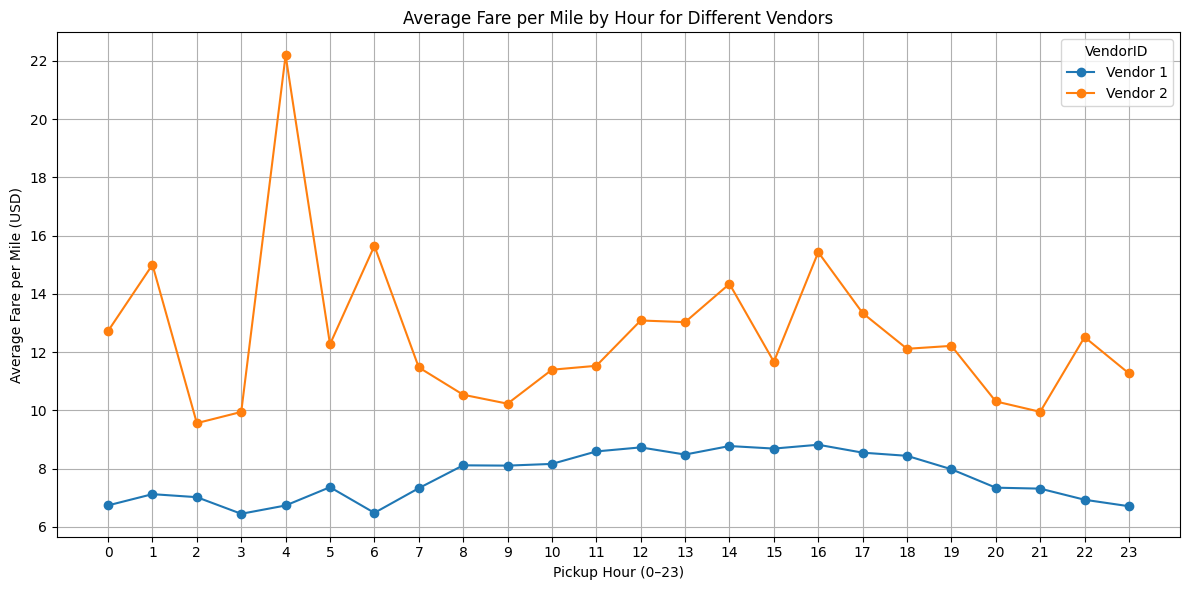

In [167]:
# Compare fare per mile for different vendors

# Tintu: Comparing the "fare per mile" for different vendors across hours of the day

# Group by VendorID and pickup_hour, compute average fare per mile
vendor_fare_by_hour = valid_fare_data.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

# Plotting it..

plt.figure(figsize=(12, 6))
for vendor in vendor_fare_by_hour["VendorID"].unique():
    subset = vendor_fare_by_hour[vendor_fare_by_hour["VendorID"] == vendor]
    plt.plot(subset["pickup_hour"], subset["fare_per_mile"], marker="o", label=f"Vendor {vendor}")

plt.title("Average Fare per Mile by Hour for Different Vendors")
plt.xlabel("Pickup Hour (0–23)")
plt.ylabel("Average Fare per Mile (USD)")
plt.xticks(range(0, 24))
plt.legend(title="VendorID")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3.2.11: Observation: Vendor 2 (VeriFone Inc) consistently charges a higher (based on average fare per mile) compared to Vendor 1 (Creative Mobile Technologies) across most hours of the day, especially during early morning time.

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [168]:
# Defining distance tiers

# Tintu: Using the "valid_fare_data" from earlier (already filtered for trip_distance > 0)

# Tintu: First step is to define distance tiers

def assign_tier(distance):
    if distance <= 2:
        return "≤ 2 miles"
    elif distance <= 5:
        return "2–5 miles"
    else:
        return "> 5 miles"

# Tintu: Assign tier labels
valid_fare_data["distance_tier"] = valid_fare_data["trip_distance"].apply(assign_tier)

# Tintu: Group by Vendor and distance tier to calculate average fare per mile
tiered_fare = valid_fare_data.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index()

# Tintu: Sort the tiers
tier_order = ["≤ 2 miles", "2–5 miles", "> 5 miles"]
tiered_fare["distance_tier"] = pd.Categorical(tiered_fare["distance_tier"], categories=tier_order, ordered=True)
tiered_fare = tiered_fare.sort_values(["VendorID", "distance_tier"]).reset_index(drop=True)

tiered_fare

VendorID distance_tier  fare_per_mile
0         1     ≤ 2 miles       9.800164
1         1     2–5 miles       6.371073
2         1     > 5 miles       4.407906
3         2     ≤ 2 miles      17.658437
4         2     2–5 miles       6.545907
5         2     > 5 miles       4.498667

#### 3.2.12: Observation: Vendor 2 (VeriFone Inc) charges higher fares for short trips (≤ 2 miles) compared to Vendor 1 (Creative Mobile Technologies), but the rate difference reduces as the distance increases.

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [169]:
#  Analyze tip percentages based on distances, passenger counts, and pickup times

# Tintu: Using valid_fare_data to avoid zero distances
tip_data = valid_fare_data.copy()

# Tintu: Calculate tip percentage
tip_data["tip_percent"] = (tip_data["tip_amount"] / (tip_data["fare_amount"])) * 100

# Tintu: Filtering out the invalid or extreme tip percentages ( above 100% and below 0)
tip_data = tip_data[(tip_data["tip_percent"] >= 0) & (tip_data["tip_percent"] <= 100)]

# Average tip % by trip distance tier (already created earlier)
avg_tip_by_distance = tip_data.groupby("distance_tier")["tip_percent"].mean().reset_index()

# Average tip % by passenger count
avg_tip_by_passenger = tip_data.groupby("passenger_count")["tip_percent"].mean().reset_index()

# Average tip % by pickup hour
avg_tip_by_hour = tip_data.groupby("pickup_hour")["tip_percent"].mean().reset_index()

# Display results
print("Average Tip % by Distance Tier:")
print(avg_tip_by_distance)
print("\nAverage Tip % by Passenger Count:")
print(avg_tip_by_passenger)
print("\nAverage Tip % by Pickup Hour:")
print(avg_tip_by_hour)

Average Tip % by Distance Tier:
  distance_tier  tip_percent
0     2–5 miles    18.662186
1     > 5 miles    16.485221
2     ≤ 2 miles    22.170835

Average Tip % by Passenger Count:
   passenger_count  tip_percent
0              1.0    20.518858
1              2.0    19.559464
2              3.0    18.789718
3              4.0    17.132781
4              5.0    20.713172
5              6.0    20.572282

Average Tip % by Pickup Hour:
    pickup_hour  tip_percent
0             0    20.303342
1             1    20.582491
2             2    19.942649
3             3    19.395702
4             4    17.126116
5             5    16.819045
6             6    18.293338
7             7    19.410799
8             8    19.819898
9             9    19.479849
10           10    19.187198
11           11    19.011480
12           12    19.004490
13           13    18.763572
14           14    18.953134
15           15    18.815815
16           16    20.808420
17           17    21.696097
18         

#### 3.2.13: Observation: Tip percentages are generally higher for shorter trips, single passenger, and during evening hours (4 PM–10 PM), suggesting that trip needs, distance of travel, and day timing influence tipping behavior

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

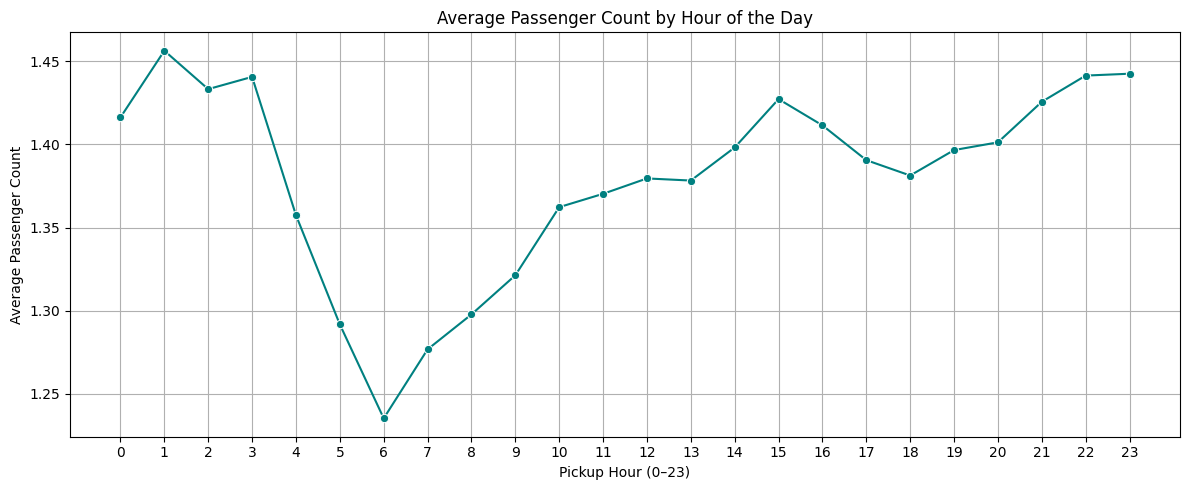

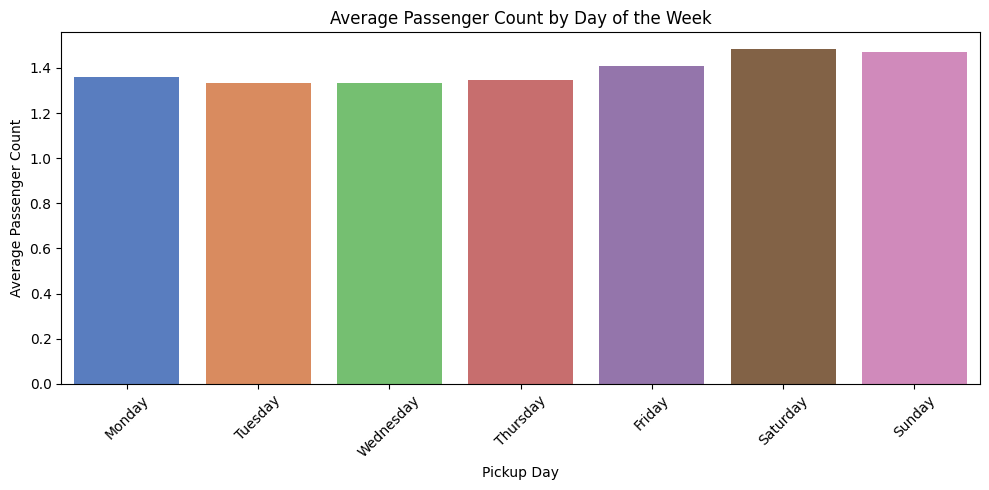

In [170]:
# See how passenger count varies across hours and days

# Tintu: Group by hour to calculate average passenger count
passenger_by_hour = df_zone.groupby("pickup_hour")["passenger_count"].mean().reset_index()

# Tintu: Group by day to calculate average passenger count
passenger_by_day = df_zone.groupby("pickup_day")["passenger_count"].mean().reset_index()

# Tintu: Sort the days properly 
# ( "day_order" is defined previously, but trying to reduce the dependency to avoid looped errors since the file is large)

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
passenger_by_day["pickup_day"] = pd.Categorical(passenger_by_day["pickup_day"], categories=day_order, ordered=True)
passenger_by_day = passenger_by_day.sort_values("pickup_day")

# Tintu: Plot - Average passenger count by hour
plt.figure(figsize=(12, 5))
sns.lineplot(data=passenger_by_hour, x="pickup_hour", y="passenger_count", marker="o", color="teal")
plt.title("Average Passenger Count by Hour of the Day")
plt.xlabel("Pickup Hour (0–23)")
plt.ylabel("Average Passenger Count")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Tintu: Plot - Average passenger count by day of week
plt.figure(figsize=(10, 5))
sns.barplot(data=passenger_by_day, x="pickup_day", y="passenger_count", palette="muted")
plt.title("Average Passenger Count by Day of the Week")
plt.xlabel("Pickup Day")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3.2.14: Observation:
* The average passenger count is higher during 12:00 AM and 3:00 AM, peaking at 1:00 AM. It then drops to the lowest at 6:00 AM before gradually rising again to another increase around 3:00 PM.
* Across the days of the week, the average passenger count remains almost same. But Saturday showing a slightly higher average than the rest.

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [171]:
# How does passenger count vary across zones

# Tintu: Group by zone and calculating the average passenger count
passenger_by_zone = df_zone.groupby("zone")["passenger_count"].mean().reset_index()

# Tintu: Sort zones by highest average passenger count
passenger_by_zone_sorted = passenger_by_zone.sort_values("passenger_count", ascending=False)

# Tintu: Displaying top 10 zones with highest average passenger counts
passenger_by_zone_sorted.head(10)

zone  passenger_count
158                  Ocean Parkway South         2.500000
3                Arrochar/Fort Wadsworth         2.250000
229                        Willets Point         2.000000
174                             Red Hook         1.870968
205                     Sunset Park West         1.812500
138                              Maspeth         1.750000
8                           Battery Park         1.729560
58                         Dyker Heights         1.666667
178  Riverdale/North Riverdale/Fieldston         1.625000
173                      Randalls Island         1.600000

#### 3.2.15: Observation:
* The first three zones with the highest average passenger counts are "Ocean Parkway South, Arrochar/Fort Wadsworth, and Willets Point"

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [172]:
# How often is each surcharge applied?

# Tintu: Frequency of extra charges applied across zones
extra_by_zone = df_zone.groupby("zone")["extra"].mean().reset_index()
extra_by_zone = extra_by_zone.sort_values("extra", ascending=False).head(10)

print("Top 10 Zones with Highest Average Extra Charges:")
print(extra_by_zone)

# Tintu: Frequency of extra charges by hour of day
extra_by_hour = df_zone.groupby("pickup_hour")["extra"].mean().reset_index()

print("\nAverage Extra Charge by Pickup Hour:")
print(extra_by_hour)

Top 10 Zones with Highest Average Extra Charges:
                          zone     extra
120          LaGuardia Airport  6.229279
61               East Elmhurst  4.607511
40                 City Island  2.500000
142             Midtown Center  1.641801
207  Times Sq/Theatre District  1.598278
9            Battery Park City  1.564897
210        UN/Turtle Bay South  1.563496
143               Midtown East  1.557618
144              Midtown North  1.556419
77    Financial District North  1.542265

Average Extra Charge by Pickup Hour:
    pickup_hour     extra
0             0  1.665332
1             1  1.522718
2             2  1.545985
3             3  1.569109
4             4  1.692363
5             5  1.848806
6             6  0.940105
7             7  0.872723
8             8  0.885030
9             9  0.942852
10           10  0.956506
11           11  0.936273
12           12  0.923834
13           13  0.924028
14           14  0.926682
15           15  0.931671
16           16  2.6

#### 3.2.16: Observations:

* The highest average extra charges are recorded in LaGuardia Airport, East Elmhurst, and City Island.
* The peak Extra surcharges are during evening hours (4 PM to 7 PM) and early morning hours (12 AM to 5 AM)

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### 4.1.1: ANSWER

### Recommendations to Optimize Routing and Dispatching

### Insights from Analysis:

Slow Routes Identified: 
* Some routes (JFK Airport to Midtown) show very low average speed (< 0.1 mph), especially during hours like 5 PM –8 PM, indicating heavy congestion, more traffic signals, or long idle times.

High Demand Hours: 
* Peak demand occurs around 3 PM to 7 PM, with the busiest hour at 6 PM, requiring more vehicle availability during these hours.
* Weekday vs Weekend Variation: Weekdays have considerably higher trip volumes, while weekends show more demand during late-night hours (12 AM–3 AM)

Nighttime Activity: 
* Zones like East Village, JFK Airport, West Village, and Times Sq exhibit high pickup activity during night hours (11 PM–5 AM), calling for specific night dispatching.


### Recommendations:

Dynamic Fleet Allocation:
* Increase vehicle presence in high-traffic zones during peak hours (especially Midtown and Airport zones from 3 PM to 7 PM).
* Reallocate taxis to downtown and nightlife zones (East Village, SoHo) during late-night hours and weekends.

Congestion-aware Routing:
* Use historical speed data to avoid routes with recurring low speeds (JFK–Midtown in the evenings)
* Consider real-time traffic integration into the fleet system to reroute efficiently during peak traffic bottlenecks
* Encourage carpooling during peak hours

Zone-based Dispatch Strategy
* Assign drivers strategically in zones that show imbalanced pickup/dropoff ratios, ensuring supply meets ground demand

Pre-positioning for Demand Spikes:
* Anticipate and prepare for surge periods (Friday evenings and Monday mornings). 
* Have pre-plans on fleet redistribution for immediate surge management
* Use past hourly trends to stage taxis in key areas before demand peaks

Night Shift Optimization:
* Assign dedicated night drivers or incentivize night shifts where dropoffs and pickups remain high (JFK, East Village, West Village)


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### 4.1.2 ANSWER

### Strategic Cab Positioning Based on Trip Trends


Insights from Analysis:

* Top Pickup Zones: Locations like JFK Airport, Upper East Side, Midtown Center, and Penn Station consistently lead in pickup volume.

* Top Dropoff Zones: Penn Station/Madison Sq West, TriBeCa/Civic Center, and Alphabet City are among the highest dropoff areas.

* Nighttime High Activity: Zones such as East Village, West Village, and Times Sq/Theatre District show high late-night activity (11 PM – 5 AM).

* Weekend Variation: Demand in certain zones ( SoHo, Battery Park City) rises sharply on weekends, especially at night.

* Hourly Patterns: Evening hours (3 PM to 7 PM) are the busiest across most zones, with Midtown zones showing a particularly high load during that time.

### Recommendations for Cab Positioning:

Airport Coverage:

* Maintain constant vehicle availability at JFK and LaGuardia, especially during late afternoons and evenings, when both inbound and outbound traffic is high, as shown in the analysis.

* Position cabs near airport hotel zones and connector highways for rapid dispatch.
* Encourage and explore prebooking possibilities so that the vendors will have a better understanding of the upcoming demand

Business Hub Saturation:

* During weekday mornings (7 AM – 10 AM), stage cabs in Midtown, Penn Station, and Financial Districts to capture commuter flow.

* Increase presence again in these areas during evening office exit hours (4 PM – 7 PM).

Nightlife Zone Readiness:

* On weekends and late evenings, deploy more cabs near East Village, West Village, SoHo, and Times Sq to capture entertainment-based traffic.

* These zones also see higher tips and extra charges—making them profitable for drivers.

Zone Rotation Strategy:

* Use historical zone data to rotate idle vehicles to adjacent busy zones (for example: shift vehicles from Murray Hill to Midtown East as demand rises)

* Ensure low-activity zones are monitored but not oversupplied.

Special Event & Weekend Planning:

* Identify the public events and ensure the cab density to manage the surges

Use Zonal Trip Ratios:

Prioritize dispatching to zones with a high imbalance in pickup and drop-off to avoid supply gaps. Example: Alphabet City and Clinton East have high pickup or dropoff trends but not both.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### 4.1.3 ANSWER

### Data-Driven Pricing Strategy Recommendations

#### Key Insights from Analysis:

Fare per Mile by Vendors:

* Vendor 2 (VeriFone Inc.) consistently charges higher fare per mile, especially for short-distance trips (≤2 miles: ~$17.66 vs ~$9.80 for Vendor 1).

* For longer trips (>5 miles), fare per mile evens out (~$4.5/mile), suggesting limited pricing flexibility.

Time-Based Fare Trends:

* Peak fare per mile occurs during late-night and early morning hours (12 AM – 3 AM).

* Average fare per mile is highest on Sundays and Thursdays, likely driven by event-based or traffic.

Revenue Contribution:

* Daytime trips (6 AM – 10 PM) contribute ~88% of the revenue, with nighttime contributing ~12%.

* Short trips (≤2 miles) are more frequent in urban zones but offer higher fare per mile, creating potential for premium pricing.

Tip Trends:

* Higher tip percentages are associated with short trips and evening pickups, showing customer willingness to pay more in high-demand periods. But in other words, the customer is more of having a fixed mindset on the tip amount rather than considering too much on the trip distance for a limit. But as the trip distance increases beyond a limit, the customers change their mind to increase the tip amount based on the prolonged trip and service provided by the driver.

### Recommended Pricing Adjustments:

Implement Tiered Pricing by Distance:

* Apply a slightly higher per-mile base fare for short-distance trips (≤2 miles), especially in central zones where demand is strong and consistent. Check the legal part to ensure that it is legitimate.

* Maintain competitive rates for medium (2–5 miles) and long trips (>5 miles) to retain customers on longer routes.

Time-of-Day Surge Pricing:

* Introduce nighttime surcharges (11 PM – 5 AM) in zones with proven high demand and low supply (Example: East Village, Times Sq), to boost off-peak revenue.

* Use dynamic pricing during peak evening hours (4 PM – 8 PM) when fare-per-mile and tip percentages are highest.

* Offer a premium service to get priority cab booking for a higher price.

* Introduce a new plan on service (premium and standard) for the customers where the premium customers need to pay extra fees but enjoy better privileges.

Zone-Specific Price Premiums:

* Apply micro-zonal surcharges in premium pickup areas like JFK, LaGuardia, Midtown Center, where customers often expect longer trips and are less price-sensitive.

* Consider event-based or location-based premium pricing for high-demand weekends near entertainment districts.

Vendor Benchmarking:

* Vendor 1 (Creative Mobile Technologies, LLC) may explore revising base fare structure on par with Vendor 2 for short trips, where price elasticity appears low.

* Leverage the fare-per-mile gap to justify service improvements or faster dispatch, enhancing value perception.

Incentivize Off-Peak Use:

* Offer discounted fares or loyalty bonuses during low-demand hours (Example: 10 AM – 3 PM) to flatten demand curves and improve asset utilization